Part 1- DATA PREPARATION AND SETUP

Import necessary libraries

In [76]:
import pandas as pd  #for handling data in structured format
import matplotlib.pyplot as plt  #for creating static data visualizations
import seaborn as sns  #for enhanced and styled plots
import numpy as np  #for handling numerical and array based operations
from datetime import datetime  #for handling work and time operations
import warnings  #suppressing non critical warnings

warnings.filterwarnings('ignore') #Ignore warning message to keep output clean

# Setting style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid') #applying dark grid style
sns.set_palette("husl")  #using Husl color palette

print("Libraries imported successfully!")

Libraries imported successfully!


Load the Datasets

In [77]:
# Loading mortgage rates data
mortgage_df = pd.read_csv('/content/drive/MyDrive/COM VIS PRJ 2 - HOUSING PRICE/MORTGAGE30US.csv')
print("MORTGAGE RATES DATA (Original Frequency)")
print("Shape:", mortgage_df.shape) #getting number of rows and columns
print("Columns:", mortgage_df.columns.tolist()) #Column names
print("\nFirst 10 rows:")
print(mortgage_df.head(10)) #displaying first 10 records

# Loading housing inventory data
inventory_df = pd.read_csv('/content/drive/MyDrive/COM VIS PRJ 2 - HOUSING PRICE/MSACSR-Housing_Inventory.csv')
print("\n\nHOUSING INVENTORY DATA (Original Frequency)")
print("Shape:", inventory_df.shape) #getting number of rows and columns
print("Columns:", inventory_df.columns.tolist()) #column names
print("\nFirst 10 rows:")
print(inventory_df.head(10)) #displaying first 10 records

# Loading median price data
median_df = pd.read_csv('/content/drive/MyDrive/COM VIS PRJ 2 - HOUSING PRICE/MSPUS-Median.csv')
print("\n\nMEDIAN HOME PRICE DATA (Original Frequency)")
print("Shape:", median_df.shape) #getting number of rows and columns
print("Columns:", median_df.columns.tolist()) #column names
print("\nFirst 10 rows:")
print(median_df.head(10)) #displaying first 10 records



MORTGAGE RATES DATA (Original Frequency)
Shape: (2847, 2)
Columns: ['observation_date', 'MORTGAGE30US']

First 10 rows:
  observation_date  MORTGAGE30US
0         4/2/1971          7.33
1         4/9/1971          7.31
2        4/16/1971          7.31
3        4/23/1971          7.31
4        4/30/1971          7.29
5         5/7/1971          7.38
6        5/14/1971          7.42
7        5/21/1971          7.44
8        5/28/1971          7.46
9         6/4/1971          7.52


HOUSING INVENTORY DATA (Original Frequency)
Shape: (752, 2)
Columns: ['observation_date', 'MSACSR']

First 10 rows:
  observation_date  MSACSR
0       1963-01-01     4.7
1       1963-02-01     6.6
2       1963-03-01     6.4
3       1963-04-01     5.3
4       1963-05-01     5.1
5       1963-06-01     6.0
6       1963-07-01     4.6
7       1963-08-01     5.6
8       1963-09-01     5.4
9       1963-10-01     5.9


MEDIAN HOME PRICE DATA (Original Frequency)
Shape: (250, 2)
Columns: ['observation_date', 'MSPUS']



Data Cleaning and Check Original Frequency

In [78]:

# Cleaning mortgage data
mortgage_df.columns = mortgage_df.columns.str.strip() #Remove extra spaces
mortgage_df['observation_date'] = pd.to_datetime(mortgage_df['observation_date']) #converting date column to datetime
mortgage_df = mortgage_df.sort_values('observation_date') #sorting data by date
mortgage_df = mortgage_df.dropna() #remove missing records

# Cleaning inventory data
inventory_df.columns = inventory_df.columns.str.strip()
inventory_df['observation_date'] = pd.to_datetime(inventory_df['observation_date'])
inventory_df = inventory_df.sort_values('observation_date')
inventory_df = inventory_df.dropna()

# Cleaning median price data
median_df.columns = median_df.columns.str.strip()
median_df['observation_date'] = pd.to_datetime(median_df['observation_date'])
median_df = median_df.sort_values('observation_date')
median_df = median_df.dropna()

print("ORIGINAL DATA FREQUENCY CHECK")

print(f"\nMortgage Data:")
print(f"  Records: {len(mortgage_df)}")
print(f"  Date Range: {mortgage_df['observation_date'].min()} to {mortgage_df['observation_date'].max()}")
print(f"  First 5 dates: {mortgage_df['observation_date'].head().tolist()}")

print(f"\nInventory Data:")
print(f"  Records: {len(inventory_df)}")
print(f"  Date Range: {inventory_df['observation_date'].min()} to {inventory_df['observation_date'].max()}")
print(f"  First 5 dates: {inventory_df['observation_date'].head().tolist()}")

print(f"\nMedian Price Data:")
print(f"  Records: {len(median_df)}")
print(f"  Date Range: {median_df['observation_date'].min()} to {median_df['observation_date'].max()}")
print(f"  First 5 dates: {median_df['observation_date'].head().tolist()}")


ORIGINAL DATA FREQUENCY CHECK

Mortgage Data:
  Records: 2847
  Date Range: 1971-04-02 00:00:00 to 2025-10-16 00:00:00
  First 5 dates: [Timestamp('1971-04-02 00:00:00'), Timestamp('1971-04-09 00:00:00'), Timestamp('1971-04-16 00:00:00'), Timestamp('1971-04-23 00:00:00'), Timestamp('1971-04-30 00:00:00')]

Inventory Data:
  Records: 752
  Date Range: 1963-01-01 00:00:00 to 2025-08-01 00:00:00
  First 5 dates: [Timestamp('1963-01-01 00:00:00'), Timestamp('1963-02-01 00:00:00'), Timestamp('1963-03-01 00:00:00'), Timestamp('1963-04-01 00:00:00'), Timestamp('1963-05-01 00:00:00')]

Median Price Data:
  Records: 250
  Date Range: 1963-01-01 00:00:00 to 2025-04-01 00:00:00
  First 5 dates: [Timestamp('1963-01-01 00:00:00'), Timestamp('1963-04-01 00:00:00'), Timestamp('1963-07-01 00:00:00'), Timestamp('1963-10-01 00:00:00'), Timestamp('1964-01-01 00:00:00')]


Convert All Data to Quarterly Frequency

In [79]:

# Function to convert any frequency to quarterly by taking the mean of each quarter
def convert_to_quarterly(df, date_col, value_col):
    """
    Convert time series data to quarterly frequency
    Groups data by quarter and takes the mean value for that quarter
    """
    # creating a copy
    df_copy = df.copy()

    #Setting the date column as index
    df_copy = df_copy.set_index(date_col)

    # Resample the data to 'Quater End' frequency
    # Use mean to aggregate multiple values within a quarter
    quarterly_df = df_copy[value_col].resample('QE').mean()

    # Reset the index to convert back into normal Dataframe
    quarterly_df = quarterly_df.reset_index()
    quarterly_df.columns = [date_col, value_col]

    # Dropping missing values if any
    quarterly_df = quarterly_df.dropna()

    return quarterly_df



# Identify value columns names
rate_col = mortgage_df.columns[1]
inv_col = inventory_df.columns[1]
price_col = median_df.columns[1]

# Applying conversion function to each dataset
mortgage_quarterly = convert_to_quarterly(mortgage_df, 'observation_date', rate_col)
inventory_quarterly = convert_to_quarterly(inventory_df, 'observation_date', inv_col)
median_quarterly = convert_to_quarterly(median_df, 'observation_date', price_col)

# printing results summary
print("\n\nQUARTERLY DATA CONVERSION COMPLETE")

print(f"\nMortgage Data (Quarterly):")
print(f"  Records: {len(mortgage_quarterly)} quarters")
print(f"  Date Range: {mortgage_quarterly['observation_date'].min()} to {mortgage_quarterly['observation_date'].max()}")
print(f"  Sample data:")
print(mortgage_quarterly.head(10))

print(f"\nInventory Data (Quarterly):")
print(f"  Records: {len(inventory_quarterly)} quarters")
print(f"  Date Range: {inventory_quarterly['observation_date'].min()} to {inventory_quarterly['observation_date'].max()}")
print(f"  Sample data:")
print(inventory_quarterly.head(10))

print(f"\nMedian Price Data (Quarterly):")
print(f"  Records: {len(median_quarterly)} quarters")
print(f"  Date Range: {median_quarterly['observation_date'].min()} to {median_quarterly['observation_date'].max()}")
print(f"  Sample data:")
print(median_quarterly.head(10))



QUARTERLY DATA CONVERSION COMPLETE

Mortgage Data (Quarterly):
  Records: 219 quarters
  Date Range: 1971-06-30 00:00:00 to 2025-12-31 00:00:00
  Sample data:
  observation_date  MORTGAGE30US
0       1971-06-30      7.413077
1       1971-09-30      7.658462
2       1971-12-31      7.552857
3       1972-03-31      7.349231
4       1972-06-30      7.346923
5       1972-09-30      7.406154
6       1972-12-31      7.430769
7       1973-03-31      7.446154
8       1973-06-30      7.650000
9       1973-09-30      8.456923

Inventory Data (Quarterly):
  Records: 251 quarters
  Date Range: 1963-03-31 00:00:00 to 2025-09-30 00:00:00
  Sample data:
  observation_date    MSACSR
0       1963-03-31  5.900000
1       1963-06-30  5.466667
2       1963-09-30  5.200000
3       1963-12-31  5.833333
4       1964-03-31  5.700000
5       1964-06-30  5.966667
6       1964-09-30  5.433333
7       1964-12-31  5.466667
8       1965-03-31  5.500000
9       1965-06-30  5.200000

Median Price Data (Quarterly):


Statistical Summary of Quarterly Data

In [80]:
print("\n\nQUARTERLY DATA - STATISTICAL SUMMARY")


print("\n1. MORTGAGE RATES (30-Year Fixed) - QUARTERLY AVERAGE")
print(mortgage_quarterly[rate_col].describe())


print("\n2. HOUSING INVENTORY (Months of Supply) - QUARTERLY AVERAGE")
print(inventory_quarterly[inv_col].describe())

print("\n3. MEDIAN HOME PRICES (USD) - QUARTERLY AVERAGE")
print(median_quarterly[price_col].describe())

# Quick Key Insights
print("\n")
print("KEY OBSERVATIONS (QUARTERLY DATA):")
print(f"  • Mortgage rates ranged from {mortgage_quarterly[rate_col].min():.2f}% to {mortgage_quarterly[rate_col].max():.2f}%")
print(f"  • Average inventory: {inventory_quarterly[inv_col].mean():.2f} months supply")
print(f"  • Median price range: ${median_quarterly[price_col].min():,.0f} to ${median_quarterly[price_col].max():,.0f}")



QUARTERLY DATA - STATISTICAL SUMMARY

1. MORTGAGE RATES (30-Year Fixed) - QUARTERLY AVERAGE
count    219.000000
mean       7.698170
std        3.193114
min        2.760714
25%        5.552212
50%        7.295833
75%        9.220769
max       17.735714
Name: MORTGAGE30US, dtype: float64

2. HOUSING INVENTORY (Months of Supply) - QUARTERLY AVERAGE
count    251.000000
mean       6.171182
std        1.649589
min        3.466667
25%        5.066667
50%        5.900000
75%        7.066667
max       11.400000
Name: MSACSR, dtype: float64

3. MEDIAN HOME PRICES (USD) - QUARTERLY AVERAGE
count       250.000000
mean     158201.200000
std      117810.565553
min       17800.000000
25%       56825.000000
50%      129850.000000
75%      236200.000000
max      442600.000000
Name: MSPUS, dtype: float64


KEY OBSERVATIONS (QUARTERLY DATA):
  • Mortgage rates ranged from 2.76% to 17.74%
  • Average inventory: 6.17 months supply
  • Median price range: $17,800 to $442,600


PART 2- VISUALIZING CORE HOUSING TRENDS

Visualization 1 - Quarterly Mortgage Rates Over Time

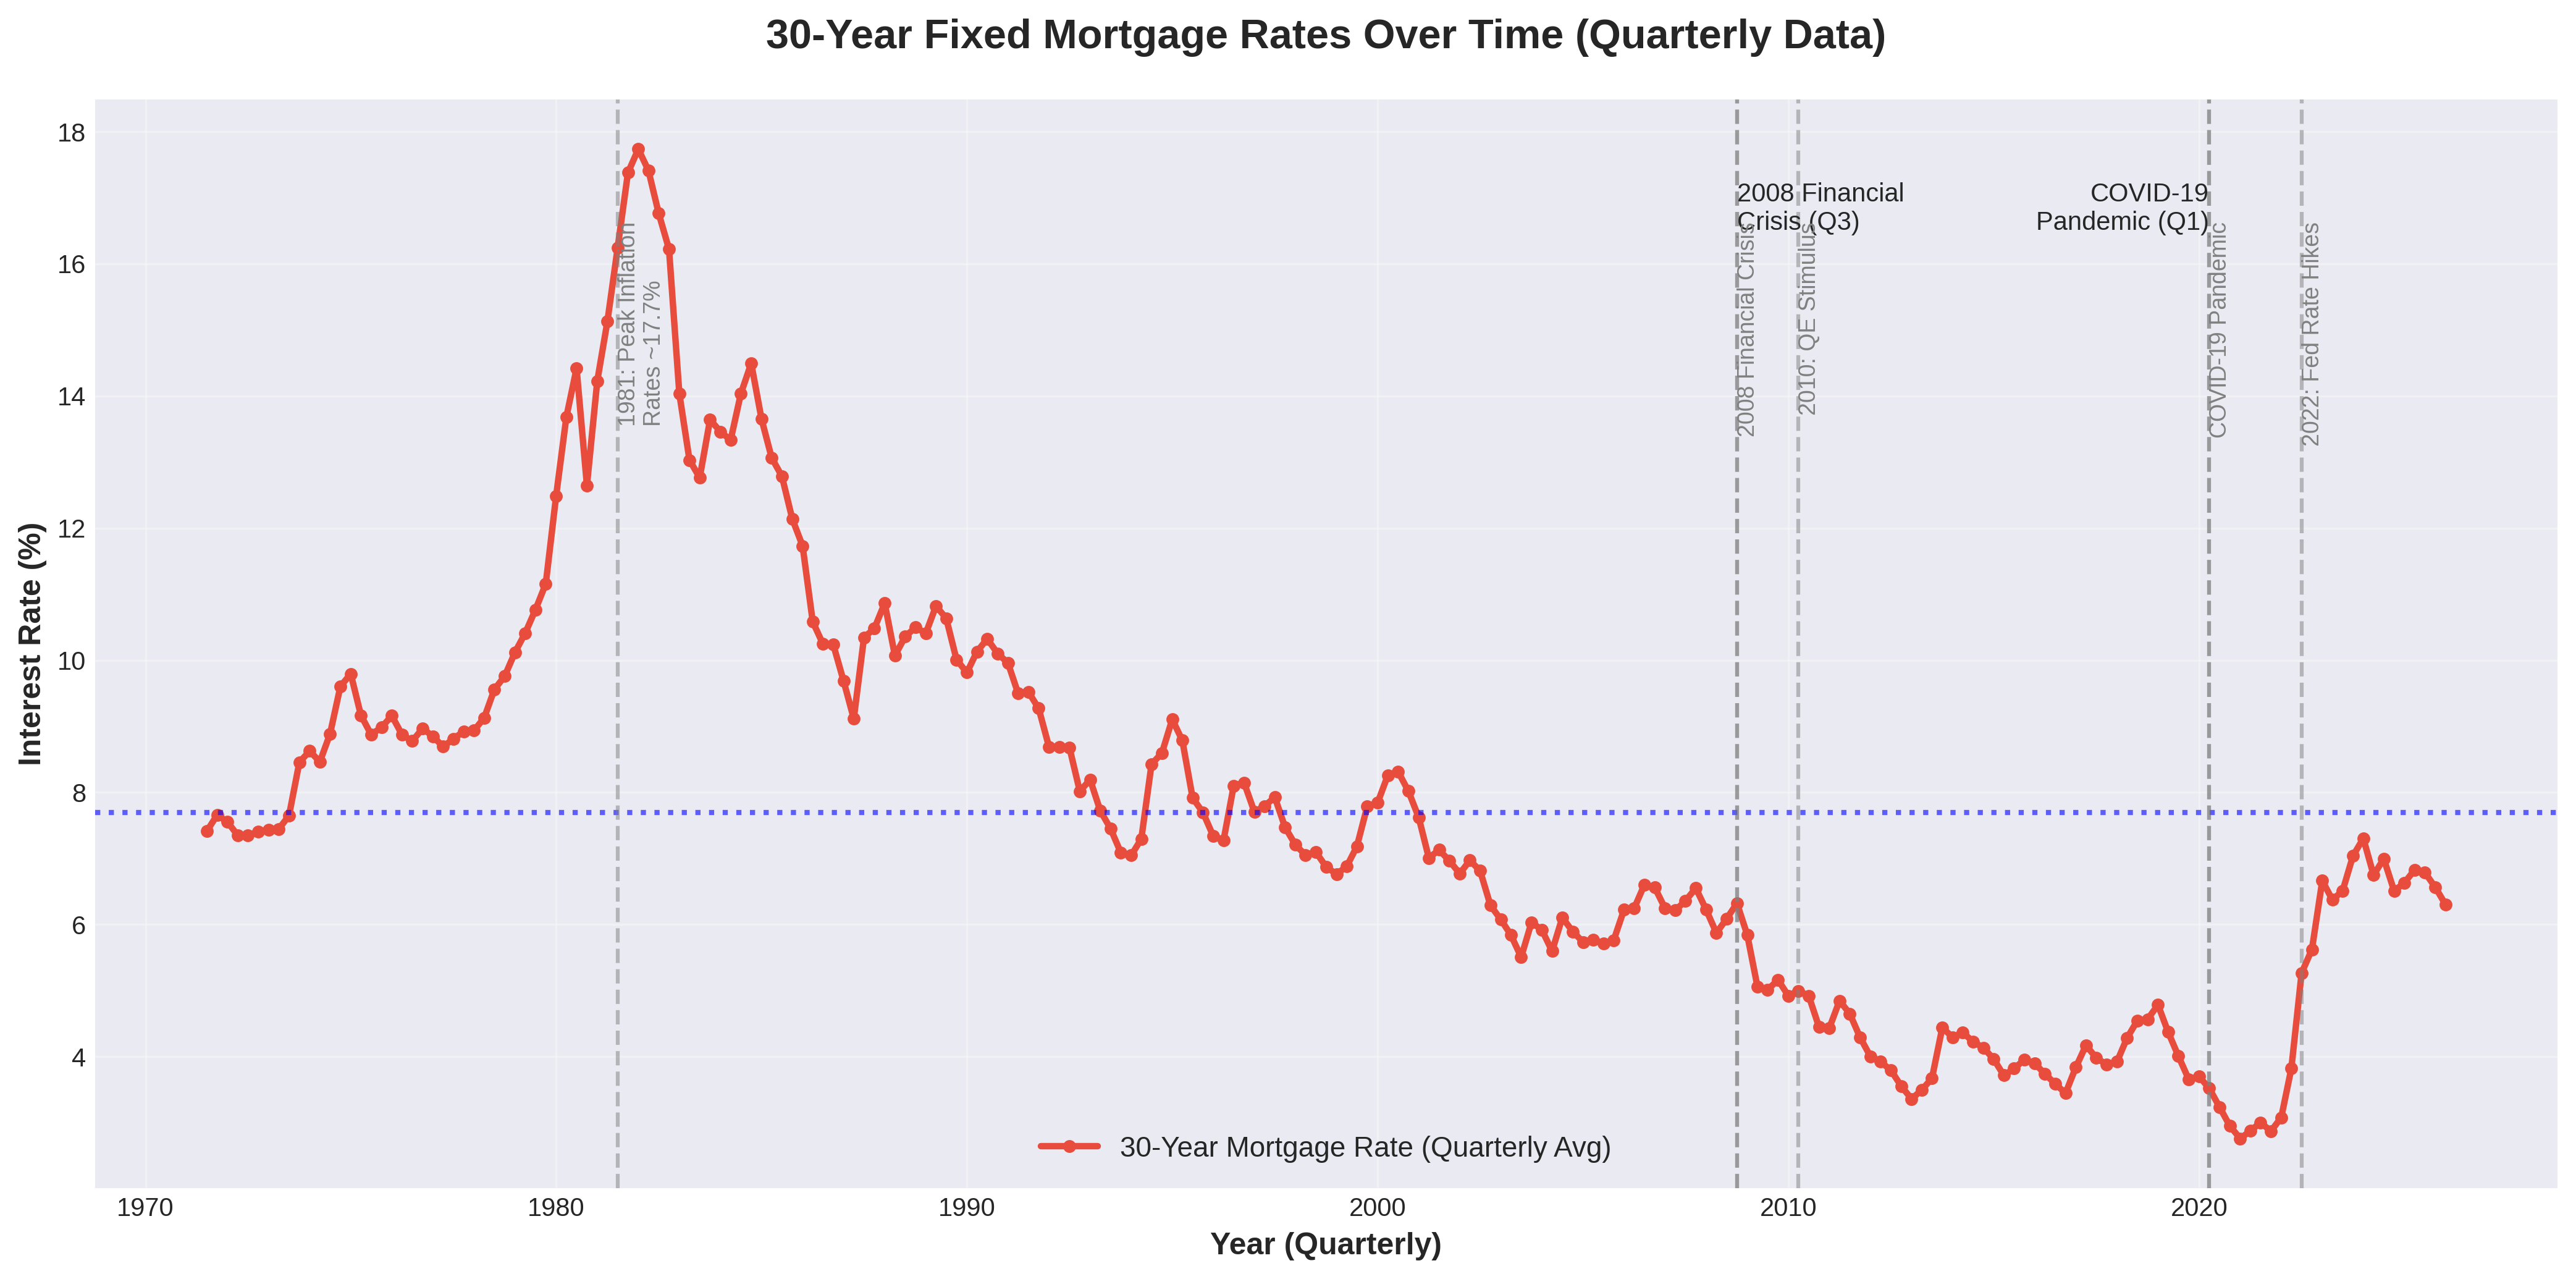

In [81]:

# Creating figure and axis
fig, ax = plt.subplots(figsize=(14, 7), dpi=300)  # Increased DPI for sharper output


# Plot the quarterly mortgage rates
ax.plot(
    mortgage_quarterly['observation_date'],
    mortgage_quarterly[rate_col],
    linewidth=2.5, color='#e74c3c', marker='o', markersize=4,
    label='30-Year Mortgage Rate (Quarterly Avg)'
)

# Annotate major economic events
crisis_date = pd.to_datetime('2008-09-30')  # Q3 2008 – Financial crisis
if mortgage_quarterly['observation_date'].min() <= crisis_date <= mortgage_quarterly['observation_date'].max():
    ax.axvline(x=crisis_date, color='gray', linestyle='--', alpha=0.5, linewidth=1.5)
    ax.text(crisis_date, mortgage_quarterly[rate_col].max() - 0.5,
            '2008 Financial\nCrisis (Q3)', fontsize=10, ha='left', va='top')

covid_date = pd.to_datetime('2020-03-31')  # Q1 2020 – COVID-19 impact
if mortgage_quarterly['observation_date'].min() <= covid_date <= mortgage_quarterly['observation_date'].max():
    ax.axvline(x=covid_date, color='gray', linestyle='--', alpha=0.5, linewidth=1.5)
    ax.text(covid_date, mortgage_quarterly[rate_col].max() - 0.5,
            'COVID-19\nPandemic (Q1)', fontsize=10, ha='right', va='top')

#Axis labels and title formatting
ax.set_xlabel('Year (Quarterly)', fontsize=12, fontweight='bold')
ax.set_ylabel('Interest Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('30-Year Fixed Mortgage Rates Over Time (Quarterly Data)',
             fontsize=16, fontweight='bold', pad=20)

ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)
plt.tight_layout()


# Additional vertical markers for other key macroeconomic events
events = {
    '1981-06-30': '1981: Peak Inflation\nRates ~17.7%',
    '2008-09-30': '2008 Financial Crisis',
    '2010-03-31': '2010: QE Stimulus',
    '2020-03-31': 'COVID-19 Pandemic',
    '2022-06-30': '2022: Fed Rate Hikes'
}
# Add a reference line for long-term average mortgage rate
avg_rate = mortgage_quarterly[rate_col].mean()
ax.axhline(y=avg_rate, color='blue', linestyle=':', linewidth=2, alpha=0.6, label=f'Long-Term Avg: {avg_rate:.2f}%')

for date, label in events.items():
    event_date = pd.to_datetime(date)
    plt.axvline(x=event_date, color='gray', linestyle='--', alpha=0.5)
    plt.text(event_date, plt.ylim()[1]*0.9, label, rotation=90,
             verticalalignment='top', fontsize=9, color='gray')

plt.show()


The chart illustrates the long-term trajectory of U.S. 30-year fixed mortgage rates from 1971 through 2025, revealing distinct economic cycles shaped by monetary policy and inflation trends. Mortgage rates reached a historic peak of nearly 18% in 1981, during the period of high inflation and tight Federal Reserve control under Chairman Paul Volcker. Rates then declined steadily over the next four decades, reaching record lows of around 2.7% in 2020 following the COVID-19 pandemic stimulus measures. These ultra-low borrowing costs triggered a massive housing boom. However, as inflation resurged post-2021, the Federal Reserve initiated aggressive rate hikes, pushing mortgage rates back above 6% by 2023–2024.

Overall, the visualization captures how interest-rate policy directly influences housing affordability and demand — with lower rates encouraging borrowing and home purchases, while higher rates cool the market and curb price growth. The cyclical spikes and dips correspond closely to major macroeconomic events such as the 1981 inflation crisis, the 2008 financial crash, and the 2022 tightening cycle.

Visualization 2 - Quarterly Housing Inventory Over Time

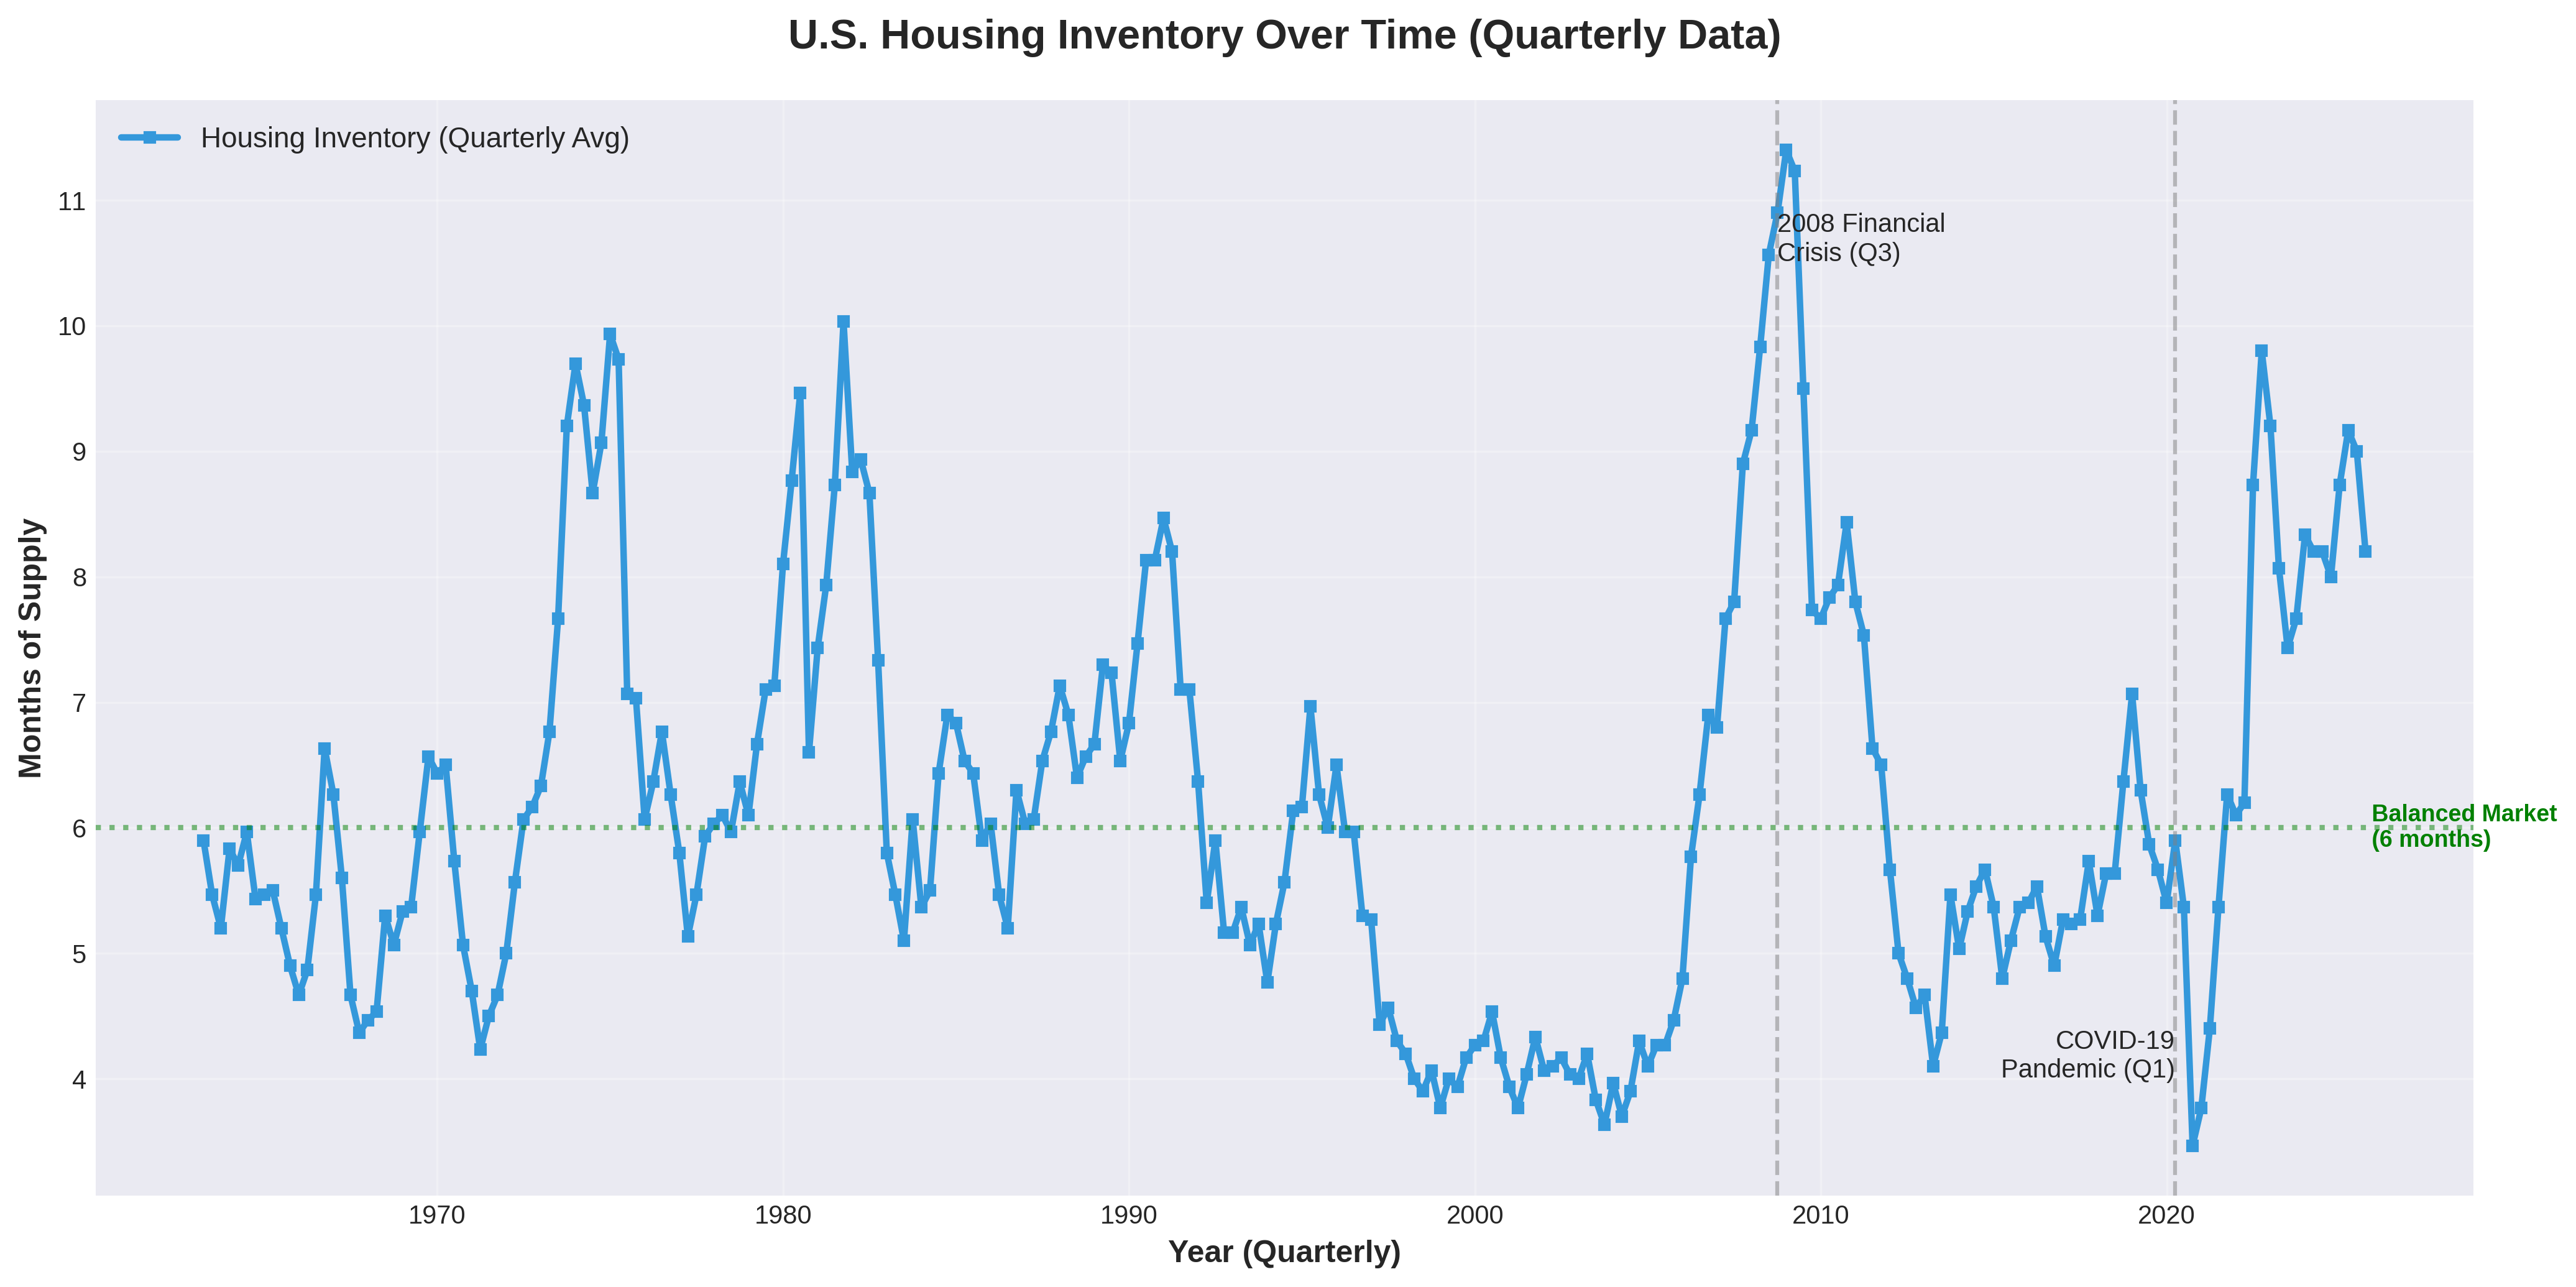

In [82]:
fig, ax = plt.subplots(figsize=(14, 7), dpi =300)

#Plot quaterly housing inventory
ax.plot(inventory_quarterly['observation_date'], inventory_quarterly[inv_col],
        linewidth=2.5, color='#3498db', label='Housing Inventory (Quarterly Avg)', marker='s', markersize=4)

# Adding balanced market reference line

# According to the National Association of Realtors (NAR),
# a balanced housing market typically has about 6 months of supply.
# - >6 months = Buyer's Market (more supply than demand)
# - <6 months = Seller's Market (limited supply, higher prices)
# This reference provides economic context for interpreting inventory levels.

balanced_inventory = 6.0
ax.axhline(y=balanced_inventory, color='green', linestyle=':', alpha=0.5, linewidth=2)
ax.text(inventory_quarterly['observation_date'].max(), balanced_inventory,
        ' Balanced Market\n (6 months)',
        verticalalignment='center', fontsize=9, color='green', fontweight='bold')

# annotating major economic events
crisis_date = pd.to_datetime('2008-09-30') # Global Financial Crisis (Q3 2008)
if crisis_date >= inventory_quarterly['observation_date'].min() and crisis_date <= inventory_quarterly['observation_date'].max():
    ax.axvline(x=crisis_date, color='gray', linestyle='--', alpha=0.5, linewidth=1.5)
    ax.text(crisis_date, inventory_quarterly[inv_col].max() - 0.5, '2008 Financial\nCrisis (Q3)',
            rotation=0, verticalalignment='top', fontsize=10, ha='left')

covid_date = pd.to_datetime('2020-03-31') # COVID-19 Pandemic (Q1 2020)
if covid_date >= inventory_quarterly['observation_date'].min() and covid_date <= inventory_quarterly['observation_date'].max():
    ax.axvline(x=covid_date, color='gray', linestyle='--', alpha=0.5, linewidth=1.5)
    ax.text(covid_date, inventory_quarterly[inv_col].min() + 0.5, 'COVID-19\nPandemic (Q1)',
            rotation=0, verticalalignment='bottom', fontsize=10, ha='right')

#Axis labels, title, and formatting
ax.set_xlabel('Year (Quarterly)', fontsize=12, fontweight='bold')
ax.set_ylabel('Months of Supply', fontsize=12, fontweight='bold')
ax.set_title('U.S. Housing Inventory Over Time (Quarterly Data)', fontsize=16, fontweight='bold', pad=20)

#adding legend, gridlines and layout optimization
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)
plt.tight_layout()

#Displaying chart
plt.show()

Analysis: U.S. Housing Inventory Over Time (Quarterly Data)

The chart shows the cyclical nature of U.S. housing inventory from 1963 to 2025.
Periods of economic slowdown or high mortgage rates, such as the early 1980s and 2008 financial crisis, saw inventory levels rise above the balanced market threshold of six months, indicating excess supply.
In contrast, strong demand periods like 2000–2005 and 2020–2021 pushed inventory to historic lows around 3–4 months, creating tight seller’s markets.
The recent uptick since 2022 reflects reduced affordability and cooling buyer demand as interest rates increased.

Visualization 3 - Quarterly Median Home Prices Over Time

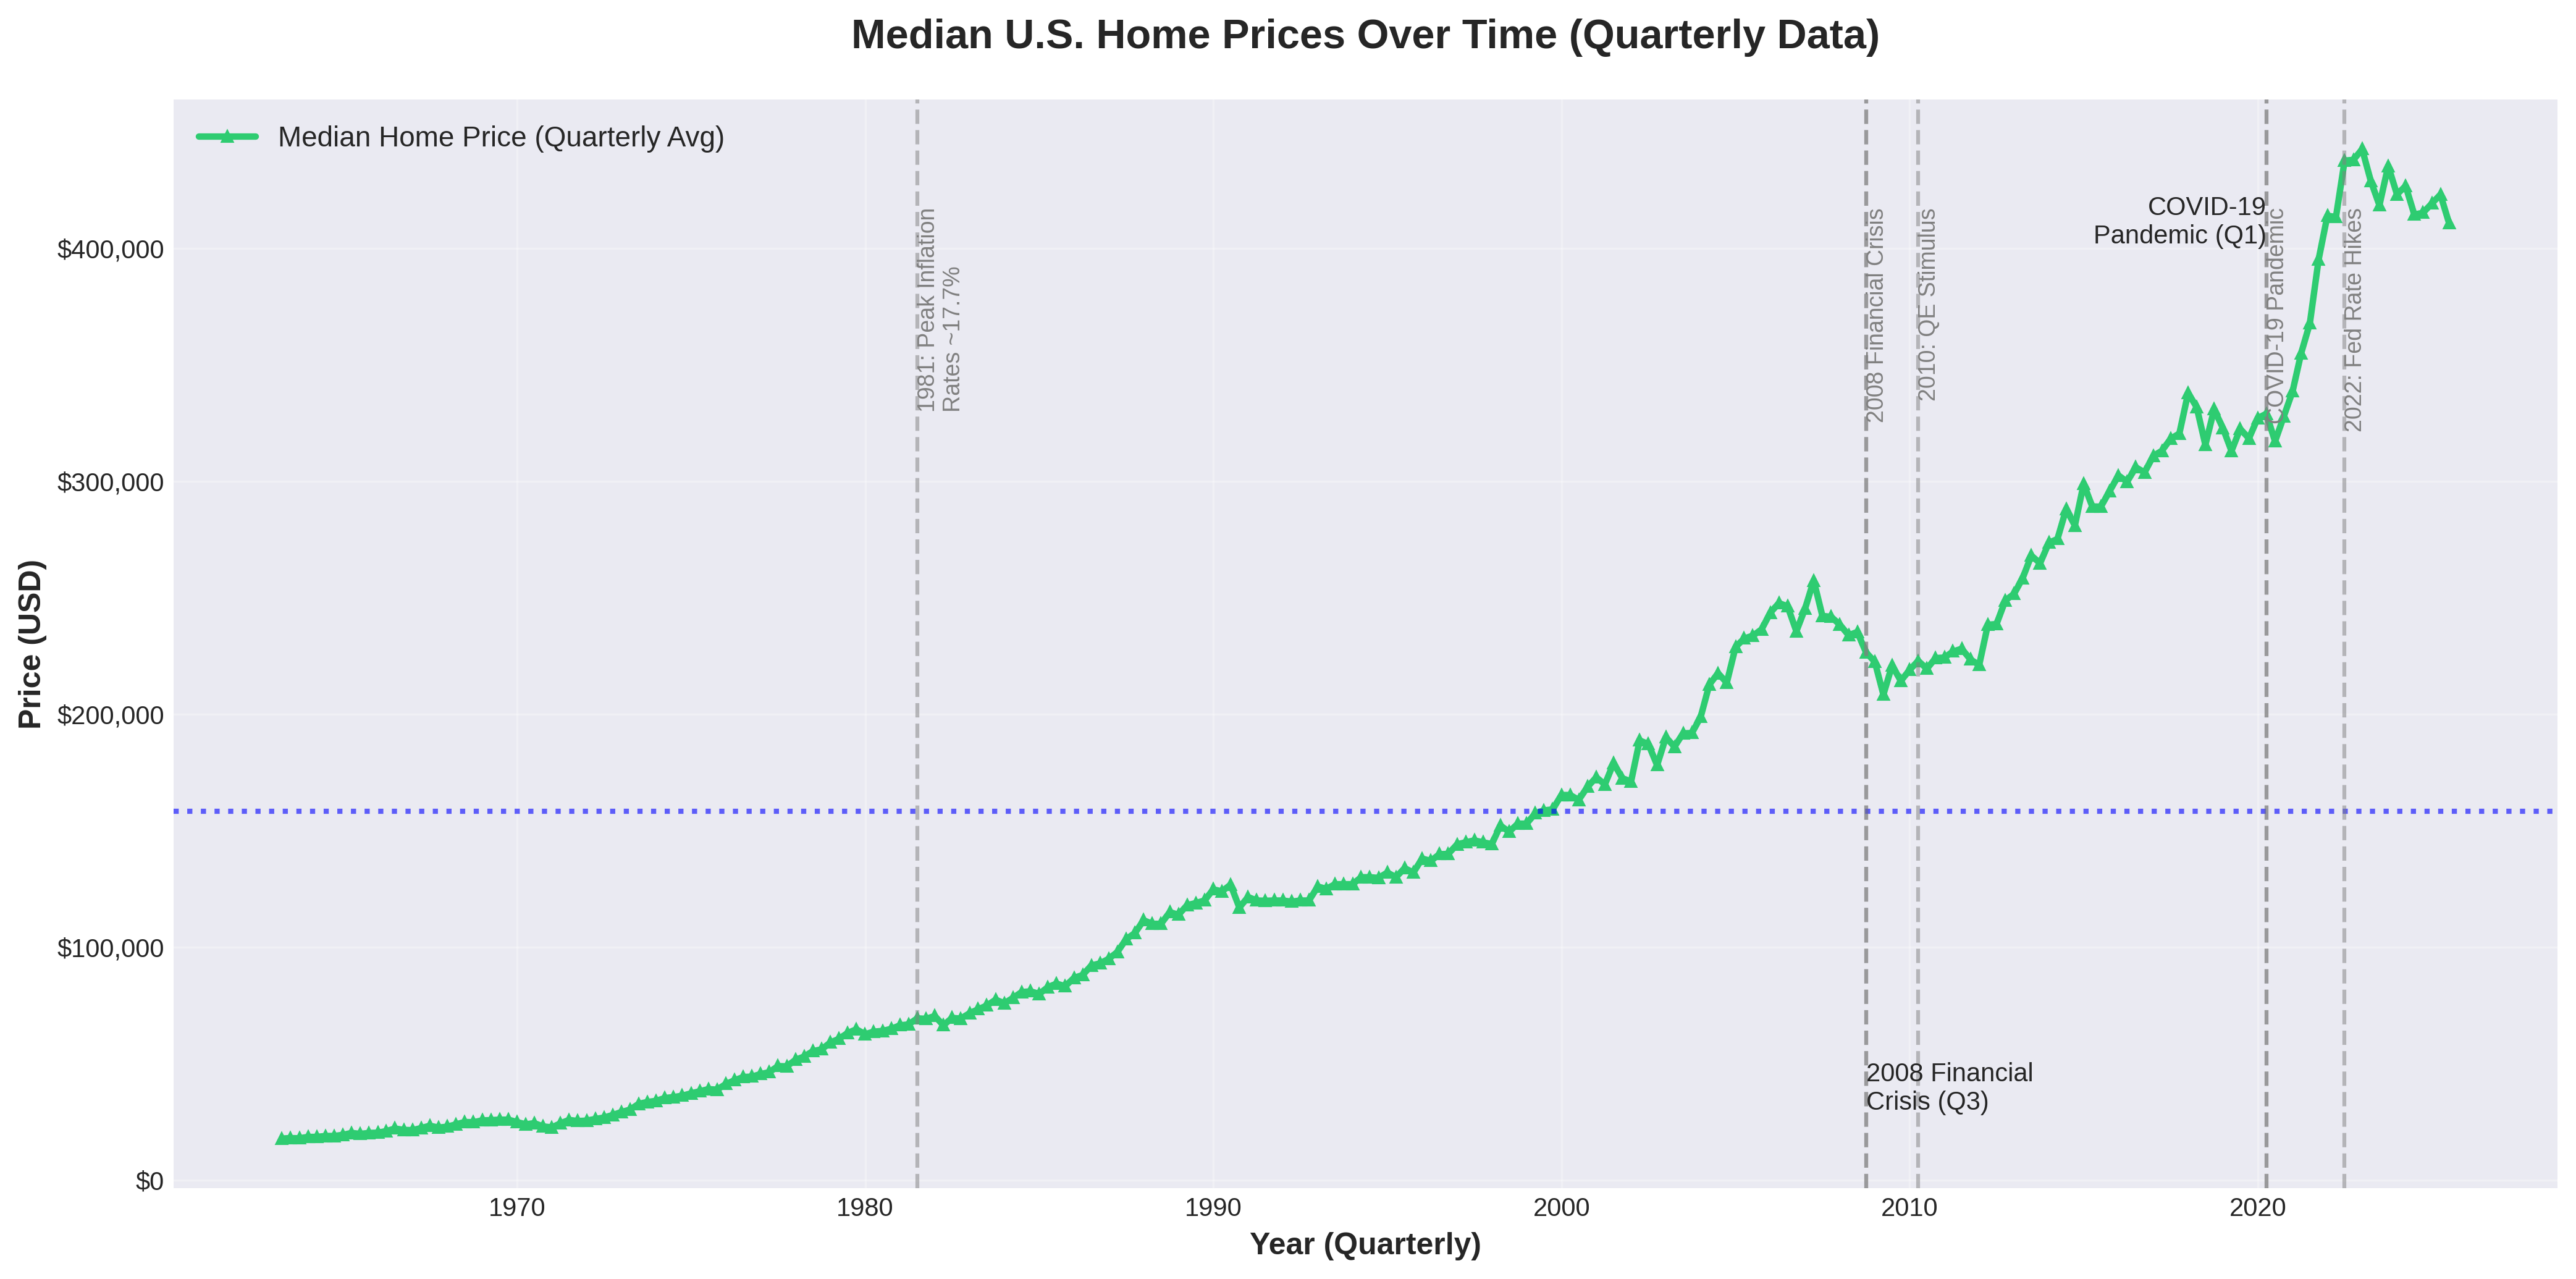

In [83]:
# Creating a high-resolution (300 DPI) figure
fig, ax = plt.subplots(figsize=(14, 7), dpi =300)

ax.plot(median_quarterly['observation_date'], #X -axis: quaterly dates
        median_quarterly[price_col], #Y-axis: median home prices (USD)
        linewidth=2.5, color='#2ecc71', #Green line
        label='Median Home Price (Quarterly Avg)',
        marker='^', markersize=4 #upward triangle markers
        )

# Adding annotations for major economic turning points
crisis_date = pd.to_datetime('2008-09-30')# Q3 2008 – Financial crisis
if crisis_date >= median_quarterly['observation_date'].min() and crisis_date <= median_quarterly['observation_date'].max():
    ax.axvline(x=crisis_date, color='gray', linestyle='--', alpha=0.5, linewidth=1.5)
    ax.text(crisis_date, median_quarterly[price_col].min() + 10000, '2008 Financial\nCrisis (Q3)',
            rotation=0, verticalalignment='bottom', fontsize=10, ha='left')

covid_date = pd.to_datetime('2020-03-31') # Q1 2020 – COVID-19 pandemic
if covid_date >= median_quarterly['observation_date'].min() and covid_date <= median_quarterly['observation_date'].max():
    ax.axvline(x=covid_date, color='gray', linestyle='--', alpha=0.5, linewidth=1.5)
    ax.text(covid_date, median_quarterly[price_col].max() - 20000, 'COVID-19\nPandemic (Q1)',
            rotation=0, verticalalignment='top', fontsize=10, ha='right')


#label axes and format the plot
ax.set_xlabel('Year (Quarterly)', fontsize=12, fontweight='bold')
ax.set_ylabel('Price (USD)', fontsize=12, fontweight='bold')
ax.set_title('Median U.S. Home Prices Over Time (Quarterly Data)', fontsize=16, fontweight='bold', pad=20)


#Formatting Y axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

#adding legends and subtle gridlines
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)

avg_price = median_quarterly[price_col].mean()
ax.axhline(y=avg_price, color='blue', linestyle=':', linewidth=2, alpha=0.6, label=f'Long-Term Avg: ${avg_price:,.0f}')

plt.tight_layout()

# Adding vertical lines for key economic events
events = {
    '1981-06-30': '1981: Peak Inflation\nRates ~17.7%',
    '2008-09-30': '2008 Financial Crisis',
    '2010-03-31': '2010: QE Stimulus',
    '2020-03-31': 'COVID-19 Pandemic',
    '2022-06-30': '2022: Fed Rate Hikes'
}

#plotting and labelling each event
for date, label in events.items():
    event_date = pd.to_datetime(date)
    plt.axvline(x=event_date, color='gray', linestyle='--', alpha=0.5)
    plt.text(event_date, plt.ylim()[1]*0.9, label, rotation=90,
             verticalalignment='top', fontsize=9, color='gray')

#Displaying chart
plt.show()

Analysis: Median U.S. Home Prices Over Time (Quarterly Data)

The chart shows a strong long-term upward trend in U.S. median home prices from 1963 to 2025.
Home values rose steadily through the late 20th century, with temporary dips during major economic downturns.
A sharp correction occurred after the 2008 financial crisis, when prices fell as foreclosures surged and credit tightened.
Following 2012, prices rebounded rapidly and accelerated during the COVID-19 pandemic (2020–2021), driven by record-low mortgage rates and limited housing supply.
By 2022–2024, the combined effects of inflation and rising interest rates slowed the pace of appreciation, signaling the start of a market adjustment.
Overall, the trend highlights how housing prices respond to macroeconomic shifts, monetary policy, and affordability cycles.

Combined Visualization - All Three Quarterly Metrics (Rates, Inventory, Prices)

The combined analysis shows that the U.S. housing market moves in clear cycles driven by economic conditions and monetary policy. Low mortgage rates consistently fuel homebuying demand, reduce inventory, and push prices upward — as seen during the 2000s boom and the 2020–2021 pandemic surge. Conversely, periods of high interest rates or financial crises increase inventory and slow price growth, such as in the early 1980s and post-2008 crash. Overall, the three indicators—rates, supply, and prices—are deeply interconnected, reflecting how policy shifts and economic shocks shape housing affordability and stability over time.

Combined Visualization - All Three Quarterly Metrics

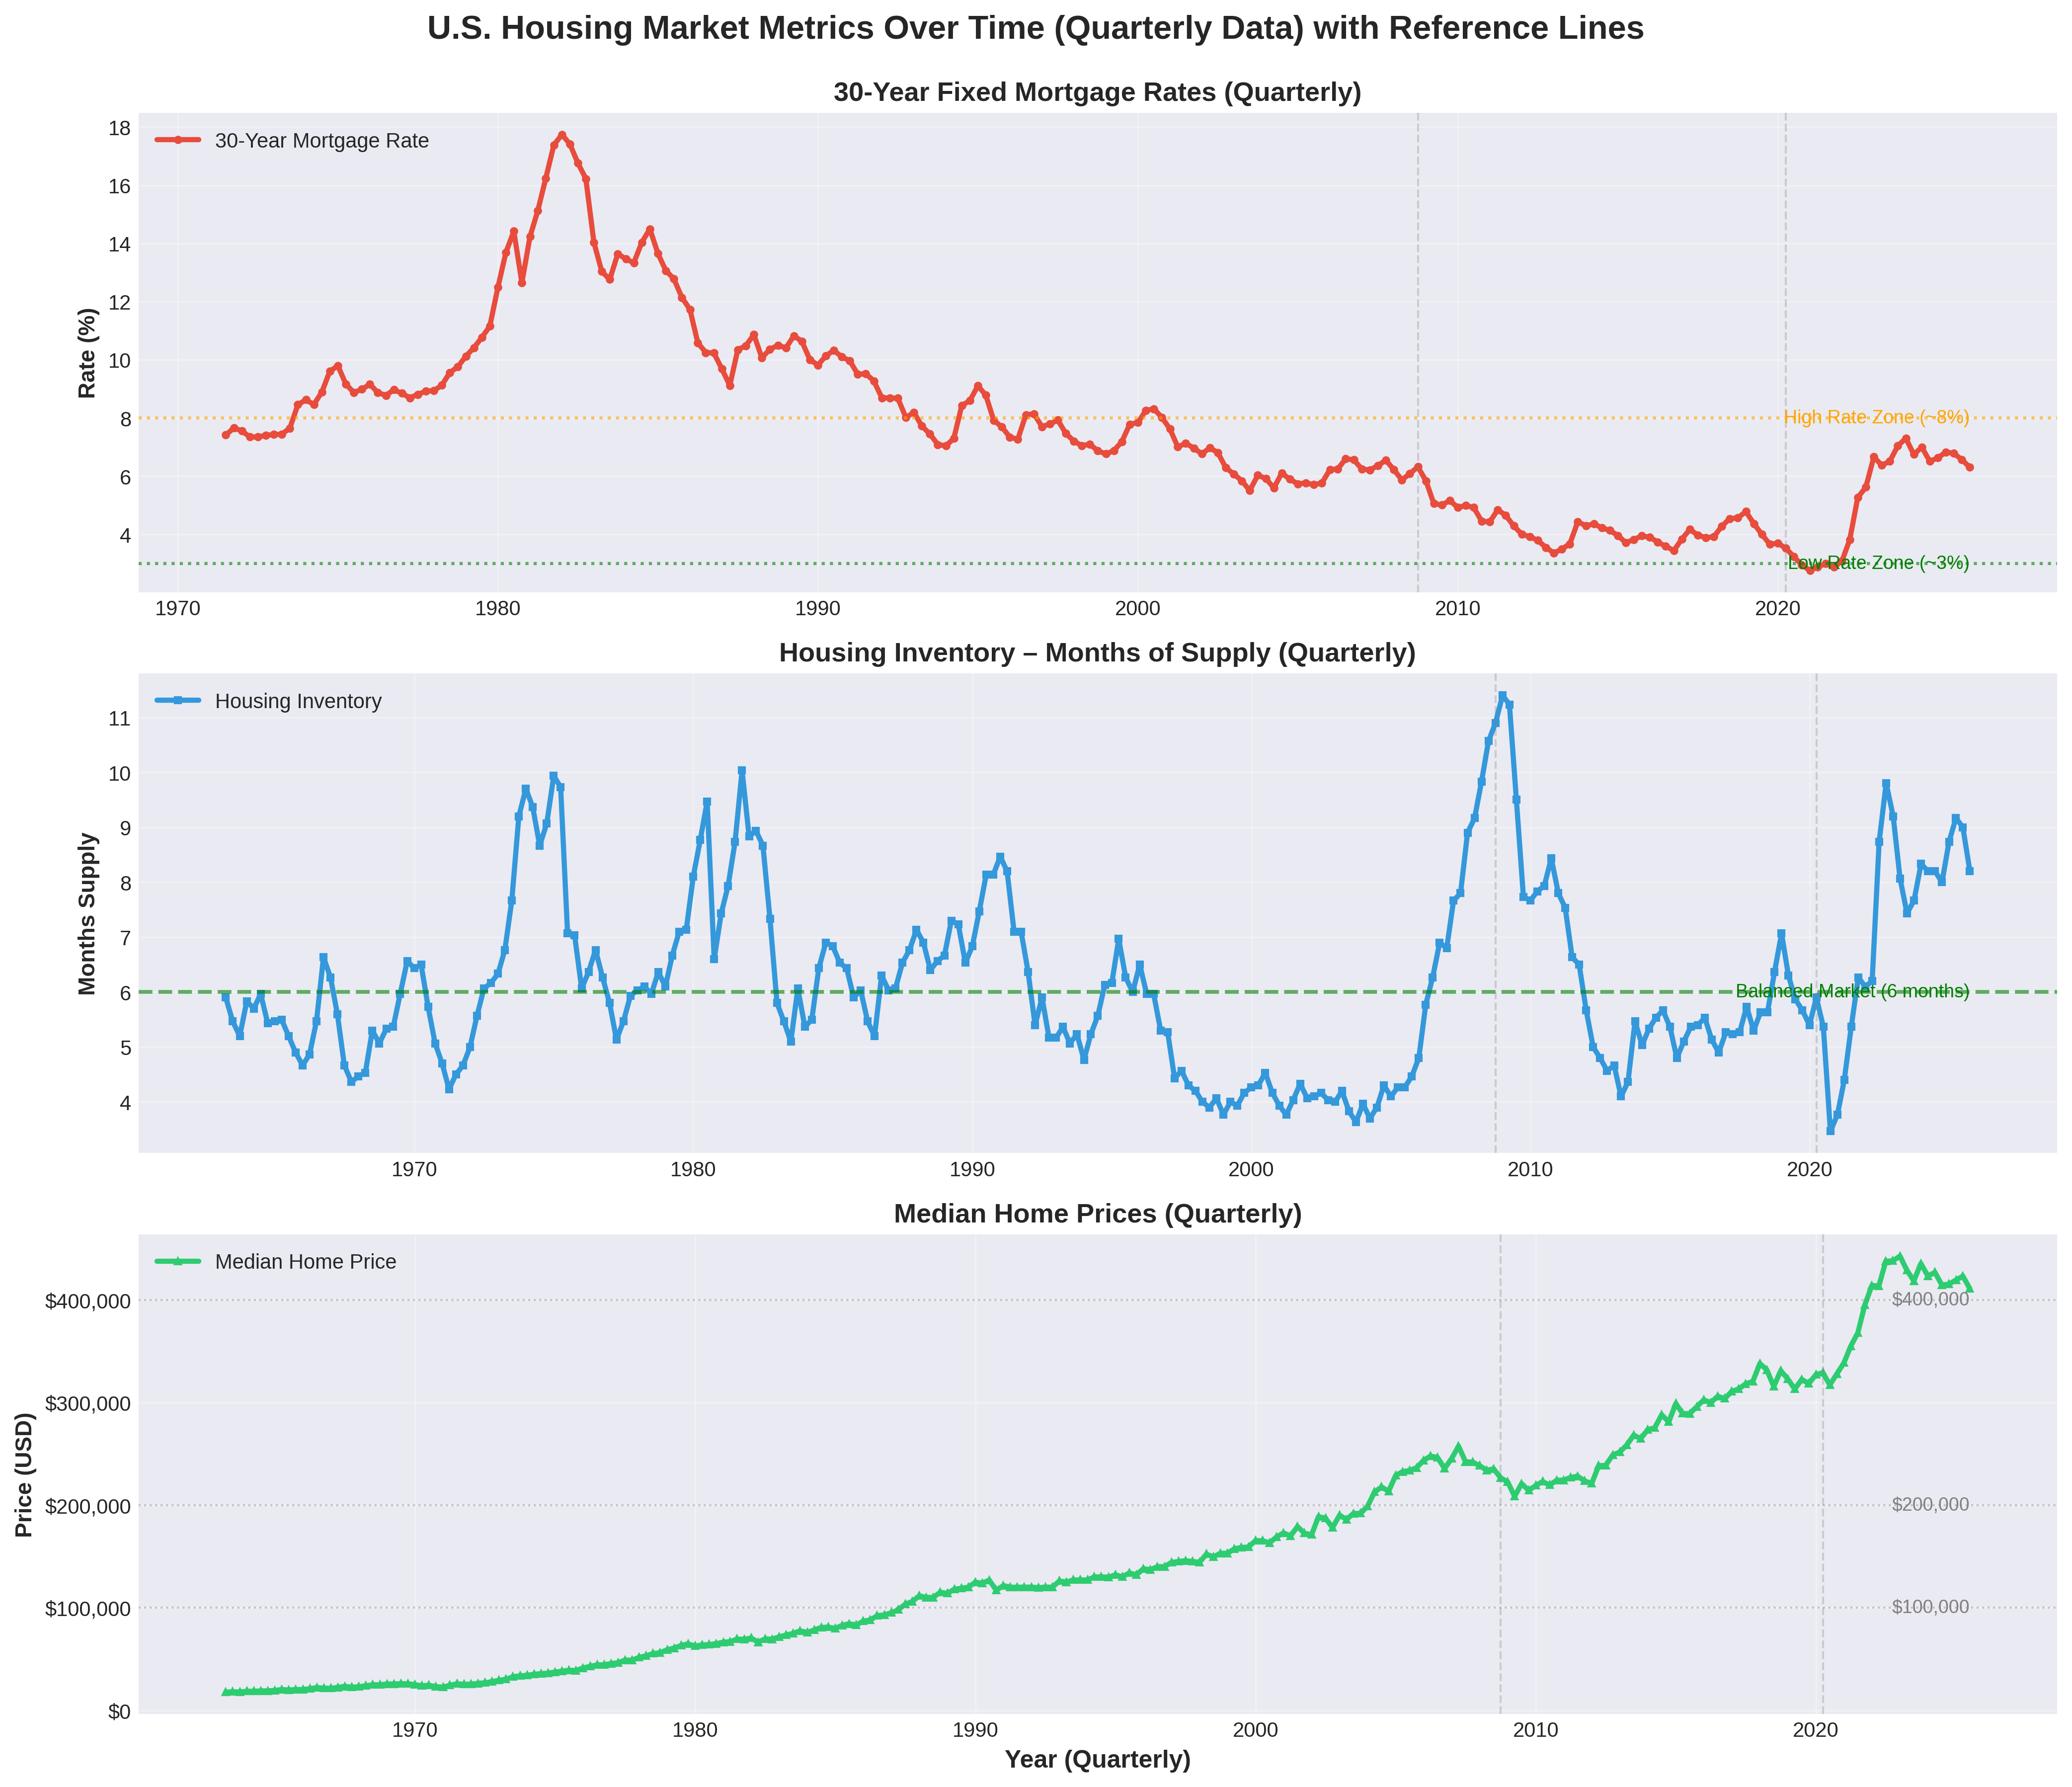

In [84]:

fig, axes = plt.subplots(3, 1, figsize=(14, 12), dpi=300)


# Plot 1: Mortgage Rates (with reference lines)

axes[0].plot(
    mortgage_quarterly['observation_date'], mortgage_quarterly[rate_col],
    linewidth=2.5, color='#e74c3c', marker='o', markersize=3,
    label='30-Year Mortgage Rate'
)

# Reference lines for low and high mortgage rate thresholds
axes[0].axhline(y=3.0, color='green', linestyle=':', linewidth=1.5, alpha=0.6)
axes[0].axhline(y=8.0, color='orange', linestyle=':', linewidth=1.5, alpha=0.6)
axes[0].text(mortgage_quarterly['observation_date'].max(), 3.0, 'Low Rate Zone (~3%)',
             color='green', fontsize=9, va='center', ha='right')
axes[0].text(mortgage_quarterly['observation_date'].max(), 8.0, 'High Rate Zone (~8%)',
             color='orange', fontsize=9, va='center', ha='right')

axes[0].set_ylabel('Rate (%)', fontsize=11, fontweight='bold')
axes[0].set_title('30-Year Fixed Mortgage Rates (Quarterly)', fontsize=13, fontweight='bold')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)


# Plot 2: Housing Inventory (with 6-month benchmark)

axes[1].plot(
    inventory_quarterly['observation_date'], inventory_quarterly[inv_col],
    linewidth=2.5, color='#3498db', marker='s', markersize=3,
    label='Housing Inventory'
)

# Balanced market reference (~6 months of supply)
axes[1].axhline(y=6.0, color='green', linestyle='--', alpha=0.6, linewidth=1.8)
axes[1].text(inventory_quarterly['observation_date'].max(), 6.0,
             'Balanced Market (6 months)', color='green', fontsize=9, va='center', ha='right')

axes[1].set_ylabel('Months Supply', fontsize=11, fontweight='bold')
axes[1].set_title('Housing Inventory – Months of Supply (Quarterly)', fontsize=13, fontweight='bold')
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)


# Plot 3: Median Home Prices (with price-level markers)

axes[2].plot(
    median_quarterly['observation_date'], median_quarterly[price_col],
    linewidth=2.5, color='#2ecc71', marker='^', markersize=3,
    label='Median Home Price'
)

# Add reference lines for price milestones
price_refs = [100000, 200000, 400000]
for val in price_refs:
    axes[2].axhline(y=val, color='gray', linestyle=':', linewidth=1, alpha=0.4)
    axes[2].text(median_quarterly['observation_date'].max(), val,
                 f'${val:,.0f}', fontsize=9, color='gray', va='center', ha='right')

axes[2].set_ylabel('Price (USD)', fontsize=11, fontweight='bold')
axes[2].set_xlabel('Year (Quarterly)', fontsize=12, fontweight='bold')
axes[2].set_title('Median Home Prices (Quarterly)', fontsize=13, fontweight='bold')
axes[2].legend(loc='best')
axes[2].grid(True, alpha=0.3)
axes[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# --------------------------------------------------
# Add synchronized economic event markers

for ax in axes:
    crisis_date = pd.to_datetime('2008-09-30')  # Financial Crisis
    covid_date = pd.to_datetime('2020-03-31')   # COVID-19 Pandemic
    ax.axvline(x=crisis_date, color='gray', linestyle='--', alpha=0.3, linewidth=1)
    ax.axvline(x=covid_date, color='gray', linestyle='--', alpha=0.3, linewidth=1)


# Overall figure title and layout

plt.suptitle('U.S. Housing Market Metrics Over Time (Quarterly Data) with Reference Lines',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

The combined visualization provides a comprehensive view of how mortgage rates, housing supply, and home prices have evolved from 1963 to 2025, with key reference lines highlighting important thresholds.
The top chart shows that periods when mortgage rates fall below 3% represent historically low borrowing costs, fueling affordability and market expansion, while rates above 8% correspond to economic tightening and reduced demand.
The middle chart incorporates the 6-month balanced market line, which separates buyer’s and seller’s market conditions—inventory spikes above this level during downturns (e.g., 1981, 2008, 2022) and falls below it during boom periods (2000–2005, 2020–2021).
The bottom chart features reference lines at $100K, $200K, and $400K, illustrating the steady and dramatic rise in home prices over six decades. Despite temporary corrections, such as the post-2008 drop, the long-term price trajectory reflects sustained demand and limited supply.
Overall, these reference markers make the visualization more interpretable, showing how monetary policy shifts and market equilibrium points shape the housing cycle across time.

PART 3: CORRELATION & MARKET RELATIONSHIPS

Merge Quarterly Data for Correlation Analysis

In [85]:

# Merge all quarterly datasets
#Using an 'outer' join
merged_quarterly = mortgage_quarterly.merge(inventory_quarterly, on='observation_date', how='outer')
merged_quarterly = merged_quarterly.merge(median_quarterly, on='observation_date', how='outer')

#sorting chronologically
merged_quarterly = merged_quarterly.sort_values('observation_date')

# Renaming columns for clarity
merged_quarterly.columns = ['observation_date', 'MortgageRate', 'Inventory', 'MedianPrice']

# Handling any missing values
# Forward fill (ffill) propagates last known valid value forward
# Backward fill (bfill) fills remaining initial missing values
merged_quarterly = merged_quarterly.fillna(method='ffill').fillna(method='bfill')

#Print dataset summary
print("\n\nMERGED QUARTERLY DATASET")
print(f"Shape: {merged_quarterly.shape}")
print(f"Date Range: {merged_quarterly['observation_date'].min()} to {merged_quarterly['observation_date'].max()}")
print(f"Number of Quarters: {len(merged_quarterly)}")
print("\nFirst 10 quarters:")
print(merged_quarterly.head(10))
print("\nLast 10 quarters:")
print(merged_quarterly.tail(10))
print(f"\nMissing values: {merged_quarterly.isnull().sum().sum()}")



MERGED QUARTERLY DATASET
Shape: (252, 4)
Date Range: 1963-03-31 00:00:00 to 2025-12-31 00:00:00
Number of Quarters: 252

First 10 quarters:
  observation_date  MortgageRate  Inventory  MedianPrice
0       1963-03-31      7.413077   5.900000      17800.0
1       1963-06-30      7.413077   5.466667      18000.0
2       1963-09-30      7.413077   5.200000      17900.0
3       1963-12-31      7.413077   5.833333      18500.0
4       1964-03-31      7.413077   5.700000      18500.0
5       1964-06-30      7.413077   5.966667      18900.0
6       1964-09-30      7.413077   5.433333      18900.0
7       1964-12-31      7.413077   5.466667      19400.0
8       1965-03-31      7.413077   5.500000      20200.0
9       1965-06-30      7.413077   5.200000      19800.0

Last 10 quarters:
    observation_date  MortgageRate  Inventory  MedianPrice
242       2023-09-30      7.040000   7.666667     435400.0
243       2023-12-31      7.303846   8.333333     423200.0
244       2024-03-31      6.748462 

The three time-series datasets were successfully merged into a unified quarterly dataset spanning 1963–2025, allowing direct comparison of mortgage rates, housing inventory, and median home prices over the same time frame.
Missing data points were handled using forward and backward filling to maintain a complete chronological sequence.
This merged dataset provides the foundation for subsequent correlation, trend, and regression analyses, helping quantify the relationships among key housing market indicators.

Correlation Analysis (Quarterly Data)



CORRELATION MATRIX (QUARTERLY DATA)
              MortgageRate  Inventory  MedianPrice
MortgageRate      1.000000   0.296533    -0.603717
Inventory         0.296533   1.000000     0.084774
MedianPrice      -0.603717   0.084774     1.000000


INTERPRETATION:
  • MortgageRate vs MedianPrice: -0.604
- Negative correlation: Higher rates tend to coincide with lower prices

  • Inventory vs MedianPrice: 0.085
- Positive correlation: More inventory tends to coincide with higher prices

  • MortgageRate vs Inventory: 0.297
- Indicates whether rate changes align with shifts in housing supply.



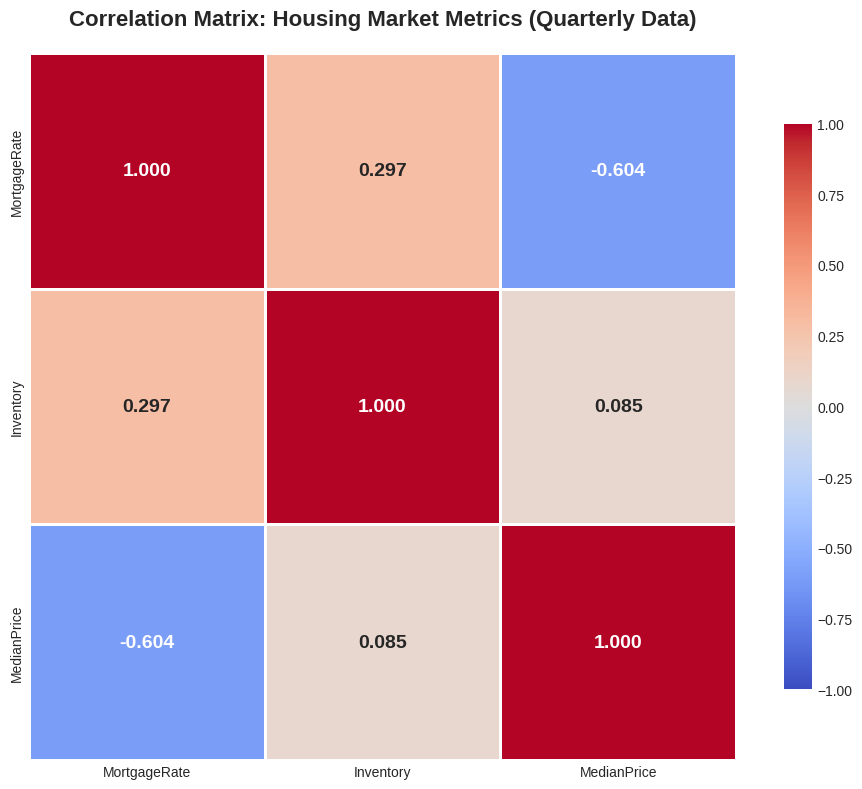

In [86]:
# Calculate correlations
correlation_matrix = merged_quarterly[['MortgageRate', 'Inventory', 'MedianPrice']].corr()

print("\n\nCORRELATION MATRIX (QUARTERLY DATA)")

print(correlation_matrix)

#Print interpretive insights for each relationship
print("\n")
print("INTERPRETATION:")

#Mortgage rate vs median price
print(f"  • MortgageRate vs MedianPrice: {correlation_matrix.loc['MortgageRate', 'MedianPrice']:.3f}")
if correlation_matrix.loc['MortgageRate', 'MedianPrice'] < 0:
    print("- Negative correlation: Higher rates tend to coincide with lower prices")
else:
    print("- Positive correlation: Higher rates tend to coincide with higher prices")

#Inventory vs Median Price
print(f"\n  • Inventory vs MedianPrice: {correlation_matrix.loc['Inventory', 'MedianPrice']:.3f}")
if correlation_matrix.loc['Inventory', 'MedianPrice'] < 0:
    print("- Negative correlation: More inventory tends to coincide with lower prices")
else:
    print("- Positive correlation: More inventory tends to coincide with higher prices")

# Mortgage Rate vs Inventory
print(f"\n  • MortgageRate vs Inventory: {correlation_matrix.loc['MortgageRate', 'Inventory']:.3f}")
print("- Indicates whether rate changes align with shifts in housing supply.\n")


# Visualize correlation matrix using Seaborn Heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1, ax=ax, annot_kws={'size': 14, 'weight': 'bold'})

#Adding title and formatting
ax.set_title('Correlation Matrix: Housing Market Metrics (Quarterly Data)',
             fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


The correlation matrix shows a strong negative relationship (–0.60) between mortgage rates and median home prices, meaning that when borrowing costs rise, housing demand and prices tend to fall.
A weak positive correlation (0.30) exists between mortgage rates and inventory, indicating that higher rates slightly increase the number of unsold homes.
Meanwhile, the inventory–price correlation (0.09) is nearly zero, suggesting that supply changes alone do not immediately affect prices without corresponding shifts in interest rates or demand.
Overall, these results confirm that mortgage rates play the most significant role in influencing long-term housing price dynamics.

Scatter Plot - Mortgage Rates vs Median Prices (Quarterly)

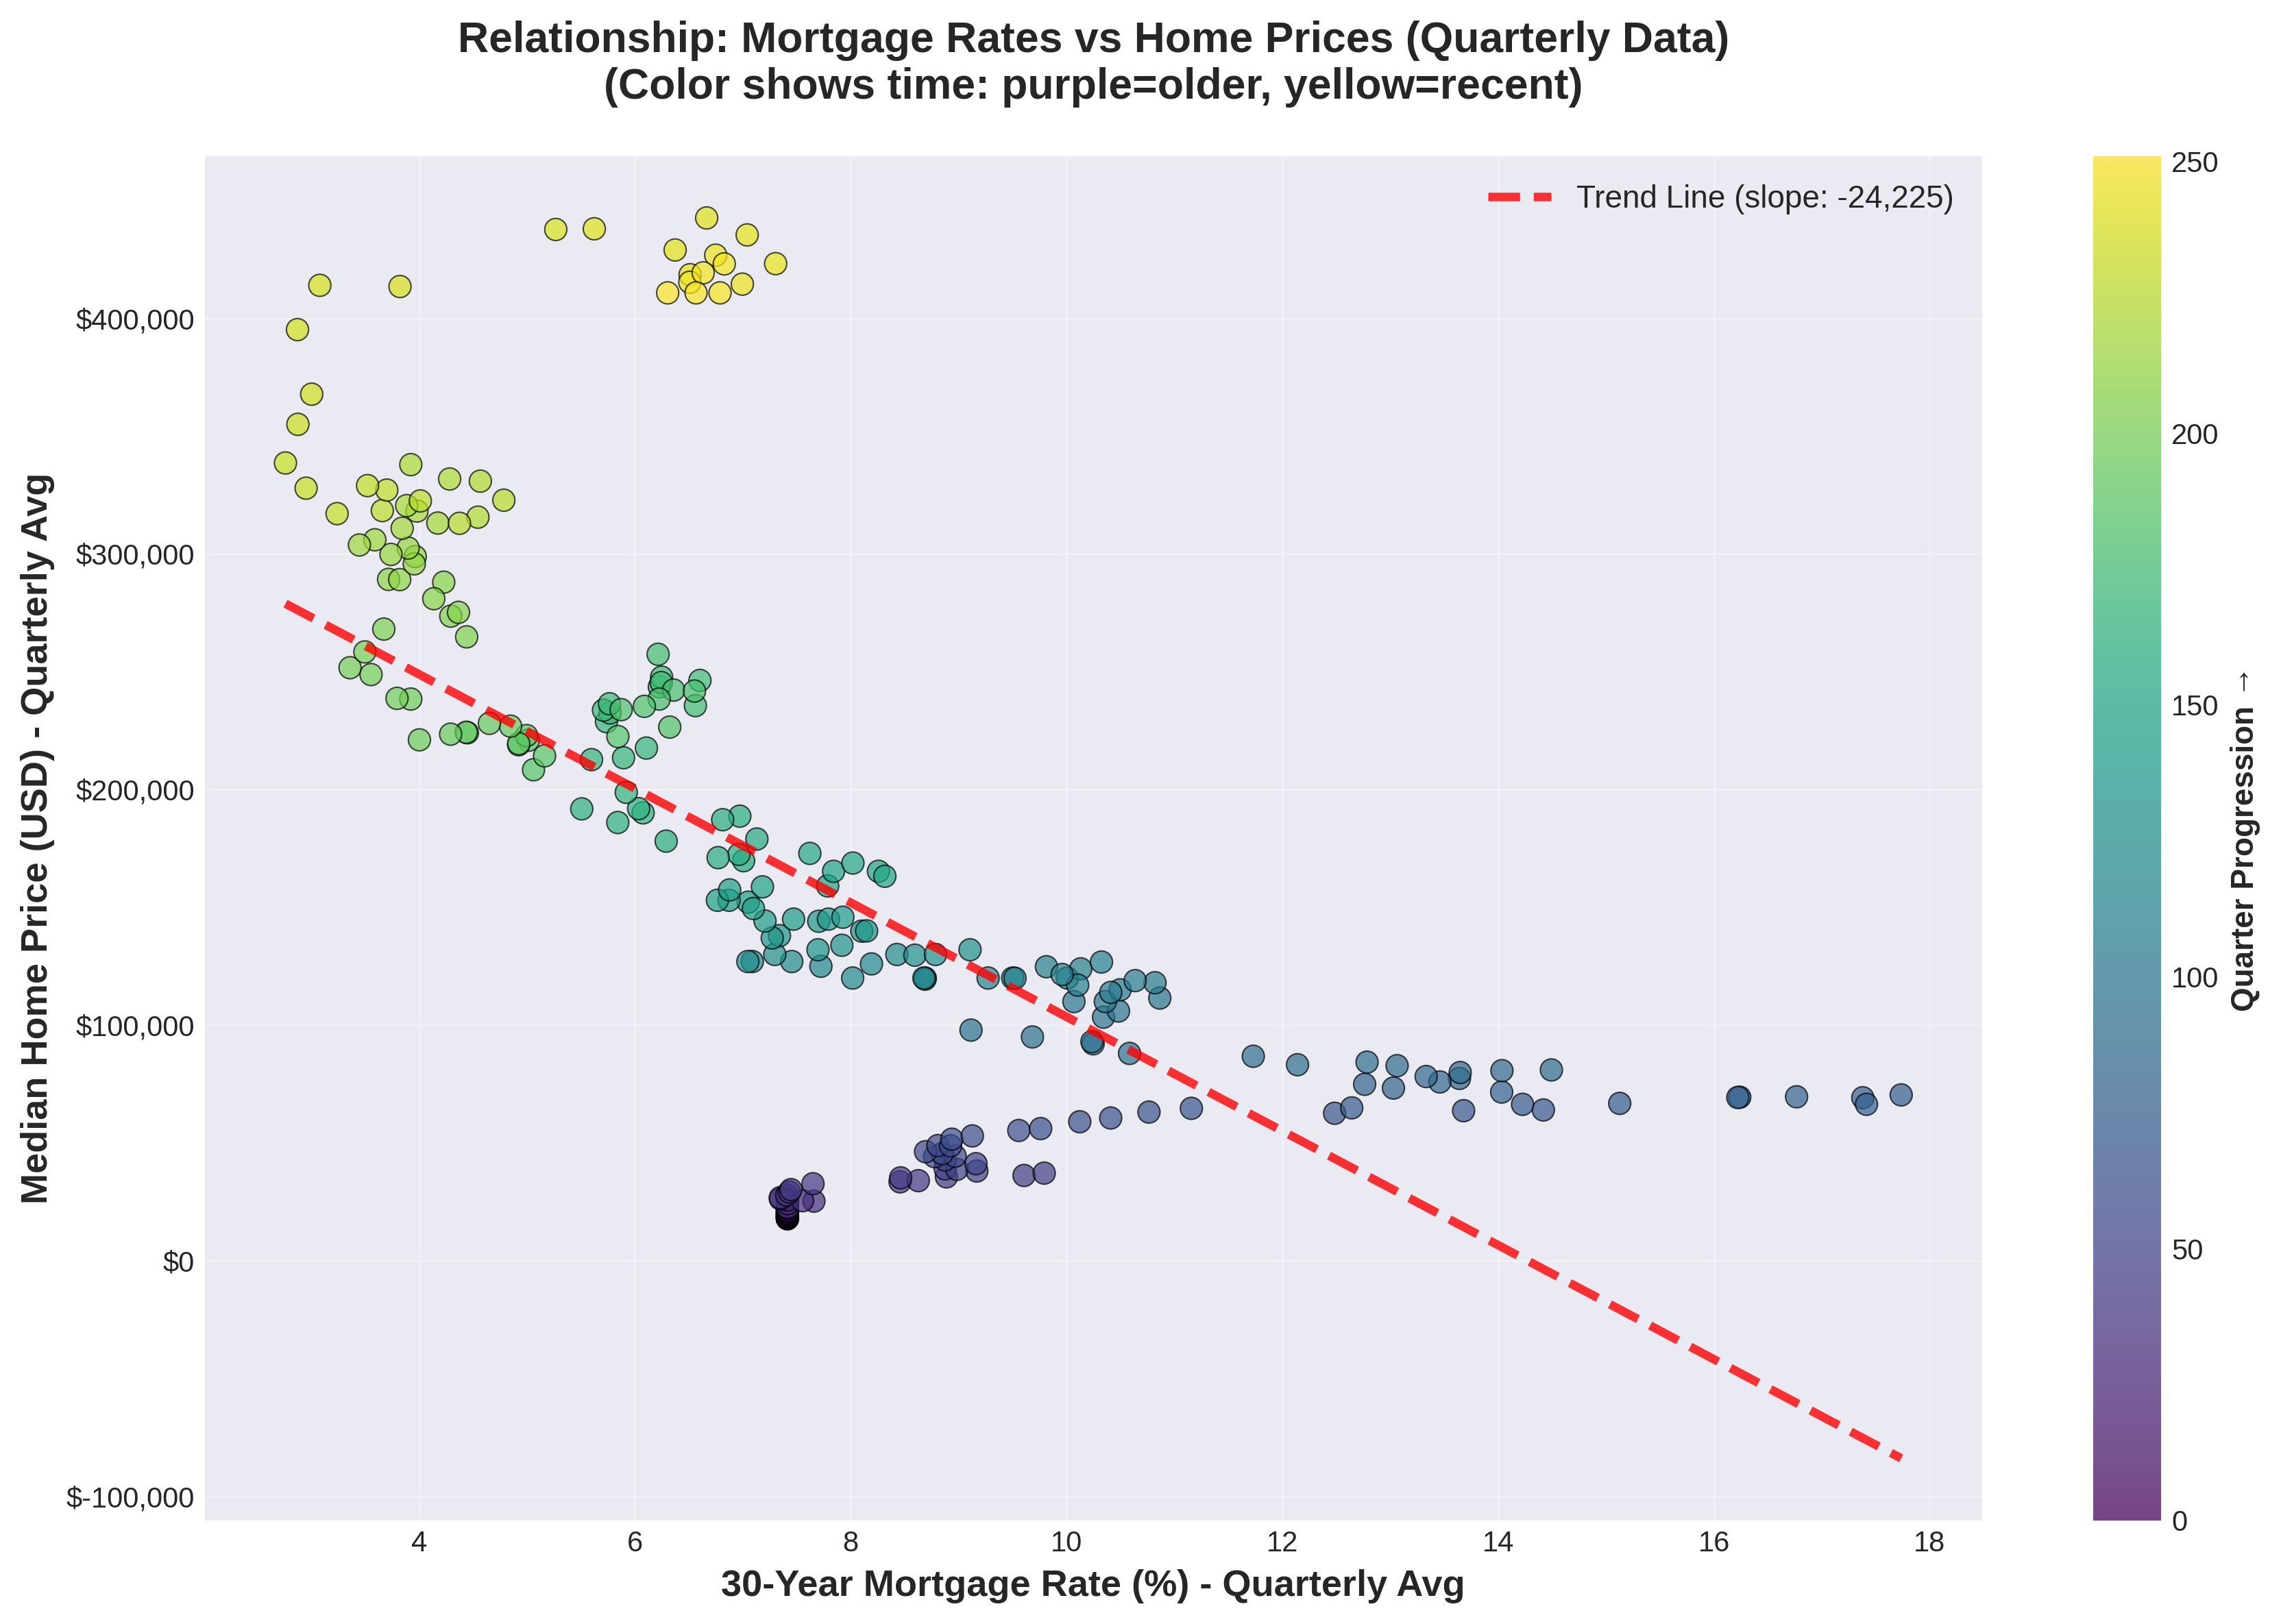

In [87]:

fig, ax = plt.subplots(figsize=(12, 8),dpi=300)

#scatter plot showing the relationship between mortgage rates and home prices
scatter = ax.scatter(merged_quarterly['MortgageRate'], merged_quarterly['MedianPrice'],
                     c=merged_quarterly.index, cmap='viridis', alpha=0.7, s=60,
                     edgecolors='black', linewidth=0.5)

# Adding linear trend line
z = np.polyfit(merged_quarterly['MortgageRate'].dropna(),
               merged_quarterly['MedianPrice'].dropna(), 1)

p = np.poly1d(z) #create polynomial model
ax.plot(merged_quarterly['MortgageRate'].sort_values(),
        p(merged_quarterly['MortgageRate'].sort_values()),
        "r--", linewidth=3, label=f'Trend Line (slope: {z[0]:,.0f})', alpha=0.8)

#Format plot labels and title
ax.set_xlabel('30-Year Mortgage Rate (%) - Quarterly Avg', fontsize=13, fontweight='bold')
ax.set_ylabel('Median Home Price (USD) - Quarterly Avg', fontsize=13, fontweight='bold')
ax.set_title('Relationship: Mortgage Rates vs Home Prices (Quarterly Data)\n(Color shows time: purple=older, yellow=recent)',
             fontsize=15, fontweight='bold', pad=20)

#Formatting Y axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

#Add colorbar to show chronlogical progression
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Adding colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Quarter Progression →', fontsize=11, fontweight='bold')

#optimize layout and display
plt.tight_layout()
plt.show()



The scatter plot shows a strong negative relationship between 30-year mortgage rates and median home prices.
As interest rates rise, home prices tend to fall, confirming the correlation value of –0.60 found earlier.
The red dashed trend line indicates that, on average, every 1% increase in mortgage rates corresponds to an approximate $24,000 decline in median home prices.
The color gradient (purple → yellow) shows how this pattern has persisted through time, with more recent quarters (yellow) clustering at higher prices but lower affordability due to recent rate hikes.

Year-over-Year Change Analysis (QUARTERLY DATA - 4 quarters = 1 year)



YEAR-OVER-YEAR CALCULATIONS (Quarterly Data)
Note: Using 4-quarter lookback (4 quarters = 1 year)

Sample YoY Changes:
    observation_date  YoY_Price_Change  YoY_Rate_Change  YoY_Inventory_Change
242       2023-09-30         -0.593607         1.416923            -21.768707
243       2023-12-31         -4.383190         0.639231             -9.420290
244       2024-03-31         -0.512821         0.376154              1.652893
245       2024-06-30         -0.955795         0.484615             10.313901
246       2024-09-30         -4.616445        -0.531538              4.347826
247       2024-12-31         -0.921550        -0.671538              4.800000
248       2025-03-31         -0.866917         0.079231             11.788618
249       2025-06-30         -0.892642        -0.206923              9.756098
250       2025-09-30         -1.083554         0.057692              2.500000
251       2025-12-31         -2.027188        -0.328974             -6.106870


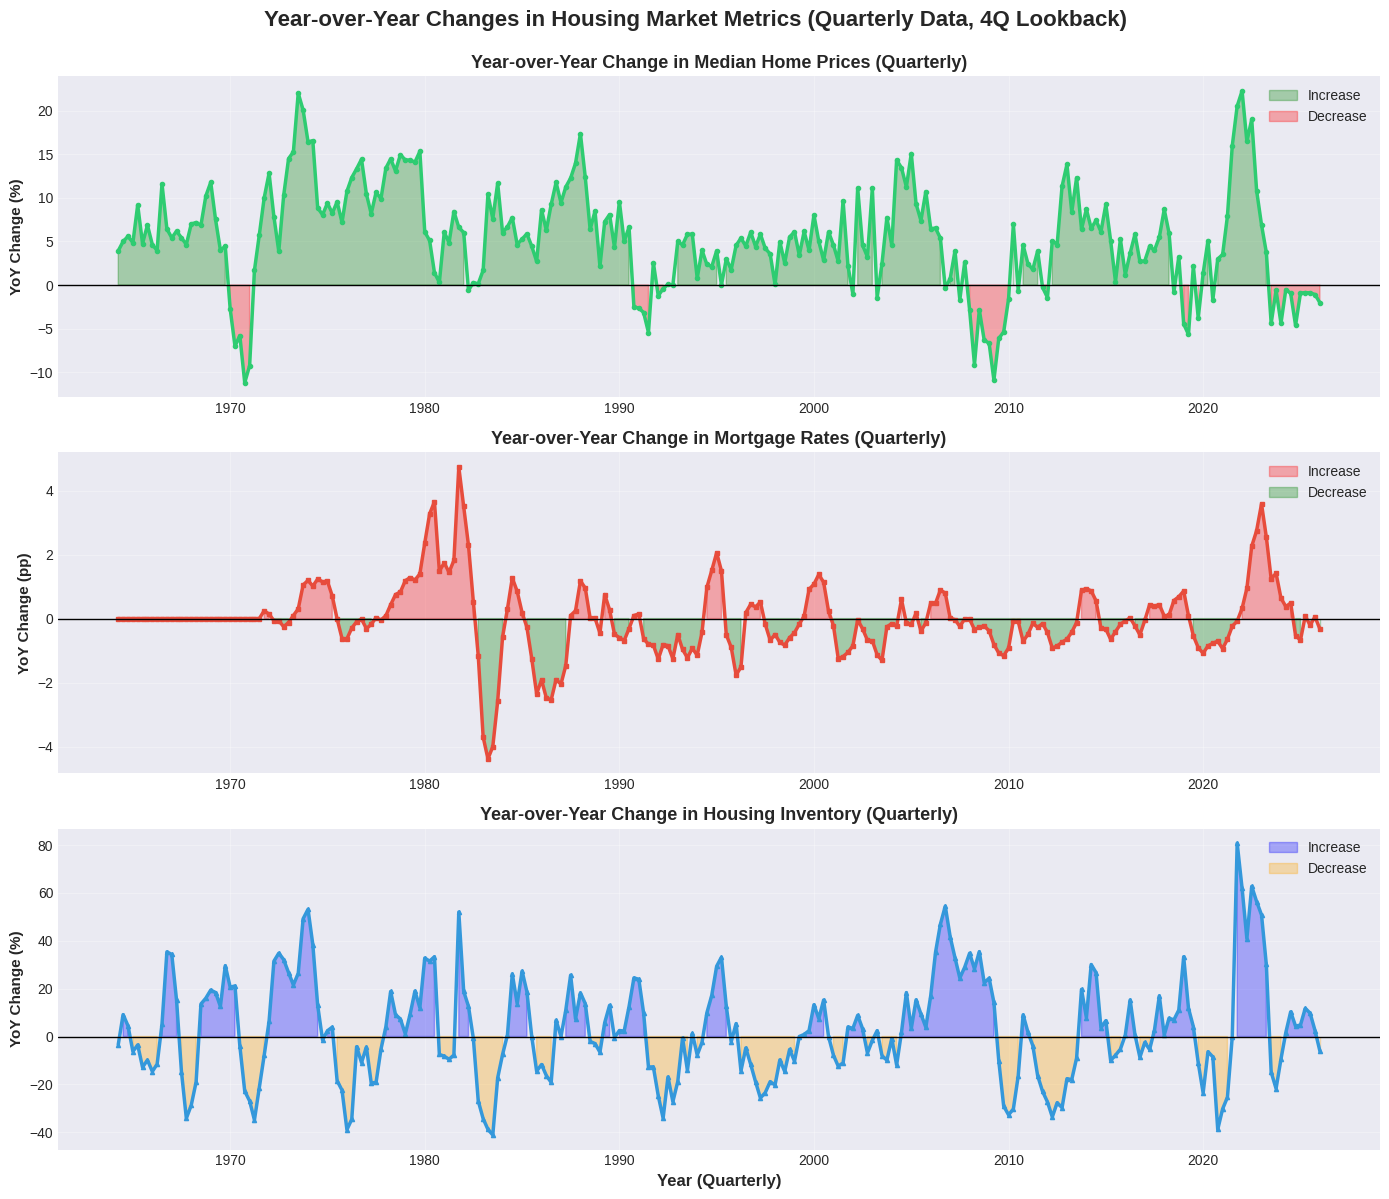

In [88]:
# Calculate YoY changes using 4 quarters lookback (since data is quarterly)
merged_quarterly['YoY_Price_Change'] = merged_quarterly['MedianPrice'].pct_change(4) * 100
merged_quarterly['YoY_Rate_Change'] = merged_quarterly['MortgageRate'].diff(4)
merged_quarterly['YoY_Inventory_Change'] = merged_quarterly['Inventory'].pct_change(4) * 100   #pct_change(4) computes percentage change compared to the same quarter last year

# Display a summary
print("\n\nYEAR-OVER-YEAR CALCULATIONS (Quarterly Data)")
print("Note: Using 4-quarter lookback (4 quarters = 1 year)")
print("\nSample YoY Changes:")
print(merged_quarterly[['observation_date', 'YoY_Price_Change', 'YoY_Rate_Change', 'YoY_Inventory_Change']].tail(10))

# Creating subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Year over year change in median home prices
axes[0].plot(
    merged_quarterly['observation_date'], merged_quarterly['YoY_Price_Change'],
    linewidth=2.5, color='#2ecc71', marker='o', markersize=3
)
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[0].fill_between(
    merged_quarterly['observation_date'], merged_quarterly['YoY_Price_Change'], 0,
    where=(merged_quarterly['YoY_Price_Change'] > 0),
    alpha=0.3, color='green', label='Increase'
    )
axes[0].fill_between(
    merged_quarterly['observation_date'], merged_quarterly['YoY_Price_Change'], 0,
    where=(merged_quarterly['YoY_Price_Change'] < 0),
    alpha=0.3, color='red', label='Decrease'
    )

axes[0].set_ylabel('YoY Change (%)', fontsize=11, fontweight='bold')
axes[0].set_title('Year-over-Year Change in Median Home Prices (Quarterly)', fontsize=13, fontweight='bold')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# Year over year change in mortgage rates
axes[1].plot(
    merged_quarterly['observation_date'], merged_quarterly['YoY_Rate_Change'],
    linewidth=2.5, color='#e74c3c', marker='s', markersize=3
    )
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1].fill_between(
    merged_quarterly['observation_date'], merged_quarterly['YoY_Rate_Change'], 0,
    where=(merged_quarterly['YoY_Rate_Change'] > 0),
    alpha=0.3, color='red', label='Increase'
    )
axes[1].fill_between(
    merged_quarterly['observation_date'], merged_quarterly['YoY_Rate_Change'], 0,
    where=(merged_quarterly['YoY_Rate_Change'] < 0),
    alpha=0.3, color='green', label='Decrease'
    )

axes[1].set_ylabel('YoY Change (pp)', fontsize=11, fontweight='bold')
axes[1].set_title('Year-over-Year Change in Mortgage Rates (Quarterly)', fontsize=13, fontweight='bold')
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

# Inventory change
axes[2].plot(merged_quarterly['observation_date'], merged_quarterly['YoY_Inventory_Change'],
             linewidth=2.5, color='#3498db', marker='^', markersize=3)
axes[2].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[2].fill_between(merged_quarterly['observation_date'], merged_quarterly['YoY_Inventory_Change'], 0,
                      where=(merged_quarterly['YoY_Inventory_Change'] > 0),
                      alpha=0.3, color='blue', label='Increase')
axes[2].fill_between(merged_quarterly['observation_date'], merged_quarterly['YoY_Inventory_Change'], 0,
                      where=(merged_quarterly['YoY_Inventory_Change'] < 0),
                      alpha=0.3, color='orange', label='Decrease')
axes[2].set_ylabel('YoY Change (%)', fontsize=11, fontweight='bold')
axes[2].set_xlabel('Year (Quarterly)', fontsize=12, fontweight='bold')
axes[2].set_title('Year-over-Year Change in Housing Inventory (Quarterly)', fontsize=13, fontweight='bold')
axes[2].legend(loc='best')
axes[2].grid(True, alpha=0.3)

plt.suptitle('Year-over-Year Changes in Housing Market Metrics (Quarterly Data, 4Q Lookback)',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


The YoY charts show that U.S. housing market trends closely follow intThe year-over-year change analysis shows clear cyclical trends across all three housing metrics.
Median home prices experienced sharp declines during major downturns such as the early 1980s recession, the 2008 financial crisis, and 2022–2023, while periods of rapid price growth followed recovery phases.
Mortgage rates show pronounced spikes during inflationary or tightening periods (notably 1981 and 2022), reflecting monetary policy actions.
Housing inventory fluctuates more dramatically, expanding during economic slowdowns when demand weakens and contracting during booms.
Together, these trends illustrate how interest-rate shocks ripple through inventory and pricing, defining each housing cycle.erest rate movements. When mortgage rates rise, home prices slow or fall and inventory grows — as seen in 1980, 2008, and 2023. When rates drop, demand surges, pushing prices up and inventory down — evident in 2002–2006 and 2020–2021. Overall, these patterns highlight that rate changes directly drive short-term housing cycles and affordability.

Moving Averages Analysis (Quarterly Data)

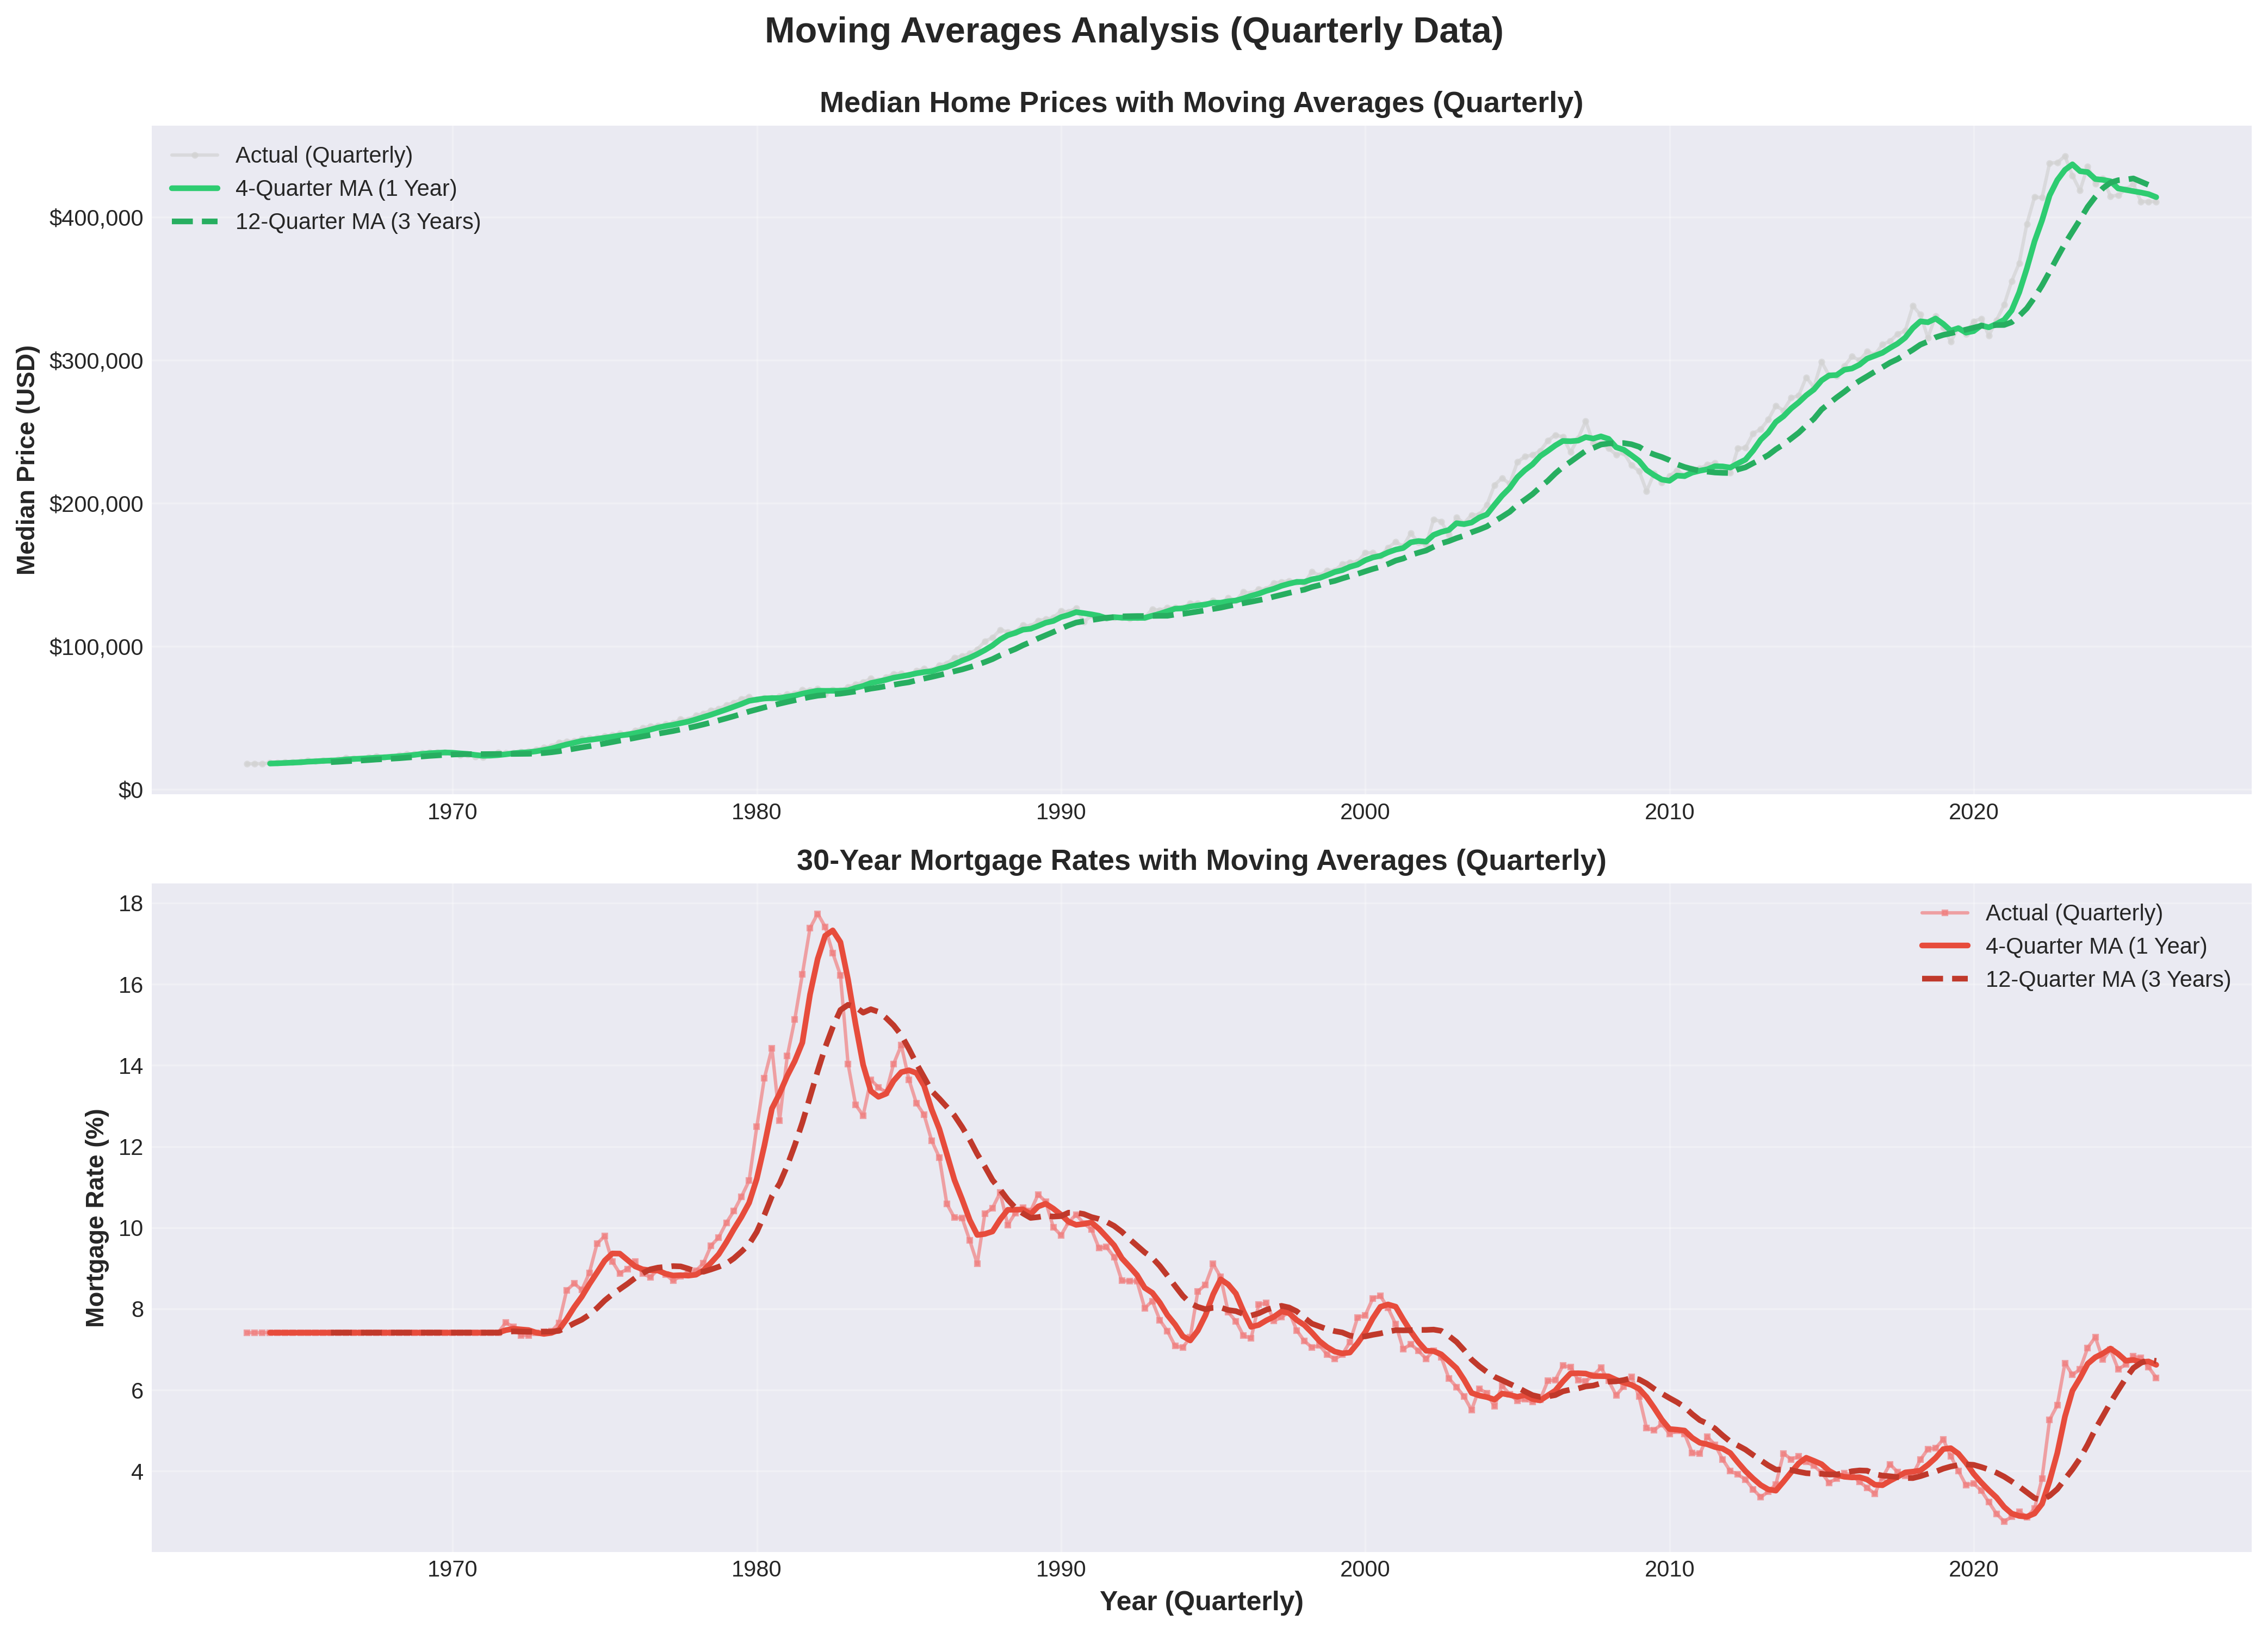

In [89]:
# Calculate moving averages (rolling windows)
merged_quarterly['Price_MA_4Q'] = merged_quarterly['MedianPrice'].rolling(window=4).mean()  # 1 year
merged_quarterly['Price_MA_12Q'] = merged_quarterly['MedianPrice'].rolling(window=12).mean()  # 3 years
merged_quarterly['Rate_MA_4Q'] = merged_quarterly['MortgageRate'].rolling(window=4).mean()
merged_quarterly['Rate_MA_12Q'] = merged_quarterly['MortgageRate'].rolling(window=12).mean()

#create
fig, axes = plt.subplots(2, 1, figsize=(14, 10), dpi= 300)

# Median Price with moving averages
axes[0].plot(
    merged_quarterly['observation_date'], merged_quarterly['MedianPrice'],
    linewidth=1.5, color='lightgray', alpha=0.7, label='Actual (Quarterly)', marker='o', markersize=2
    )
axes[0].plot(
    merged_quarterly['observation_date'], merged_quarterly['Price_MA_4Q'],
    linewidth=2.5, color='#2ecc71', label='4-Quarter MA (1 Year)'
    )
axes[0].plot(
    merged_quarterly['observation_date'], merged_quarterly['Price_MA_12Q'],
    linewidth=2.5, color='#27ae60', label='12-Quarter MA (3 Years)', linestyle='--'
    )

axes[0].set_ylabel('Median Price (USD)', fontsize=11, fontweight='bold')
axes[0].set_title('Median Home Prices with Moving Averages (Quarterly)', fontsize=13, fontweight='bold')
axes[0].legend(loc='best', fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# 30 year mortgage rates - with 1 year & 3 year moving averages
axes[1].plot(
    merged_quarterly['observation_date'], merged_quarterly['MortgageRate'],
    linewidth=1.5, color='lightcoral', alpha=0.7, label='Actual (Quarterly)', marker='s', markersize=2
    )
axes[1].plot(
    merged_quarterly['observation_date'], merged_quarterly['Rate_MA_4Q'],
    linewidth=2.5, color='#e74c3c', label='4-Quarter MA (1 Year)'
    )
axes[1].plot(
    merged_quarterly['observation_date'], merged_quarterly['Rate_MA_12Q'],
    linewidth=2.5, color='#c0392b', label='12-Quarter MA (3 Years)', linestyle='--')

axes[1].set_ylabel('Mortgage Rate (%)', fontsize=11, fontweight='bold')
axes[1].set_xlabel('Year (Quarterly)', fontsize=12, fontweight='bold')
axes[1].set_title('30-Year Mortgage Rates with Moving Averages (Quarterly)', fontsize=13, fontweight='bold')
axes[1].legend(loc='best', fontsize=10)
axes[1].grid(True, alpha=0.3)


#Final figure formatting
plt.suptitle('Moving Averages Analysis (Quarterly Data)', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


The moving averages highlight long-term housing market trends by smoothing short-term volatility.
Median home prices show a steady long-term increase, with only two major corrections — following the 2008 financial crisis and again around 2022–2023 during rising interest rates.
The short-term (4Q) moving average reacts quickly to price shifts, while the long-term (12Q) curve captures broader, multi-year trends.
Mortgage rates display clear cyclical behavior: peaking near 18% in 1981, declining steadily until 2020, and then surging again after 2021 as inflation pressures returned.
These smoothed trends make it easier to identify structural turning points and long-term cycles in both home prices and borrowing costs.

Seasonal & Trend Decomposition

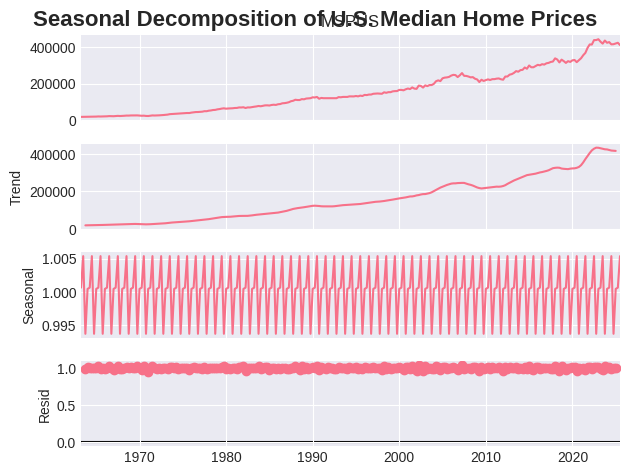

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform multiplicative decomposition on quaterly home price data
# with the level of time series
# period = 4 indicates quarterly seasonality (4 quarters per year)

decomp = seasonal_decompose(
    median_quarterly.set_index('observation_date')['MSPUS'],
    model='multiplicative',
    period=4
)

#plotting
decomp.plot()
plt.suptitle('Seasonal Decomposition of U.S. Median Home Prices', fontsize=16, fontweight='bold')
plt.show()

The decomposition shows that U.S. median home prices are trend-dominant, with only minor seasonal variation.
The trend component captures a clear long-term upward movement, interrupted briefly during the 2008 financial crisis and again in 2022–2023.
The seasonal component reveals a subtle quarterly cycle (≈1% amplitude), likely linked to stronger home-buying activity in spring and early summer.
The residual component is relatively stable, indicating that most price changes are explained by long-term structural and seasonal effects rather than random fluctuations.

**Key Statistics and Export (Quarterly Data)**

**From 1963 to 2025, U.S. median home prices rose by over 2200%, reflecting strong long-term growth despite short downturns. Mortgage rates fell from historic highs of 17.7% (1981) to lows near 2.7% (2020), shaping affordability cycles. Housing inventory fluctuated, peaking during crises like 2008 and tightening during booms such as 2020–2021. Correlation analysis shows that interest rates have the strongest impact, with higher rates reducing prices and increasing supply. Overall, the data highlights a resilient housing market with long-term appreciation and rate-driven short-term volatility.**

PART 4- REGIONAL AND COMPARATIVE INSIGHTS

Regional Median Home Price Analysis

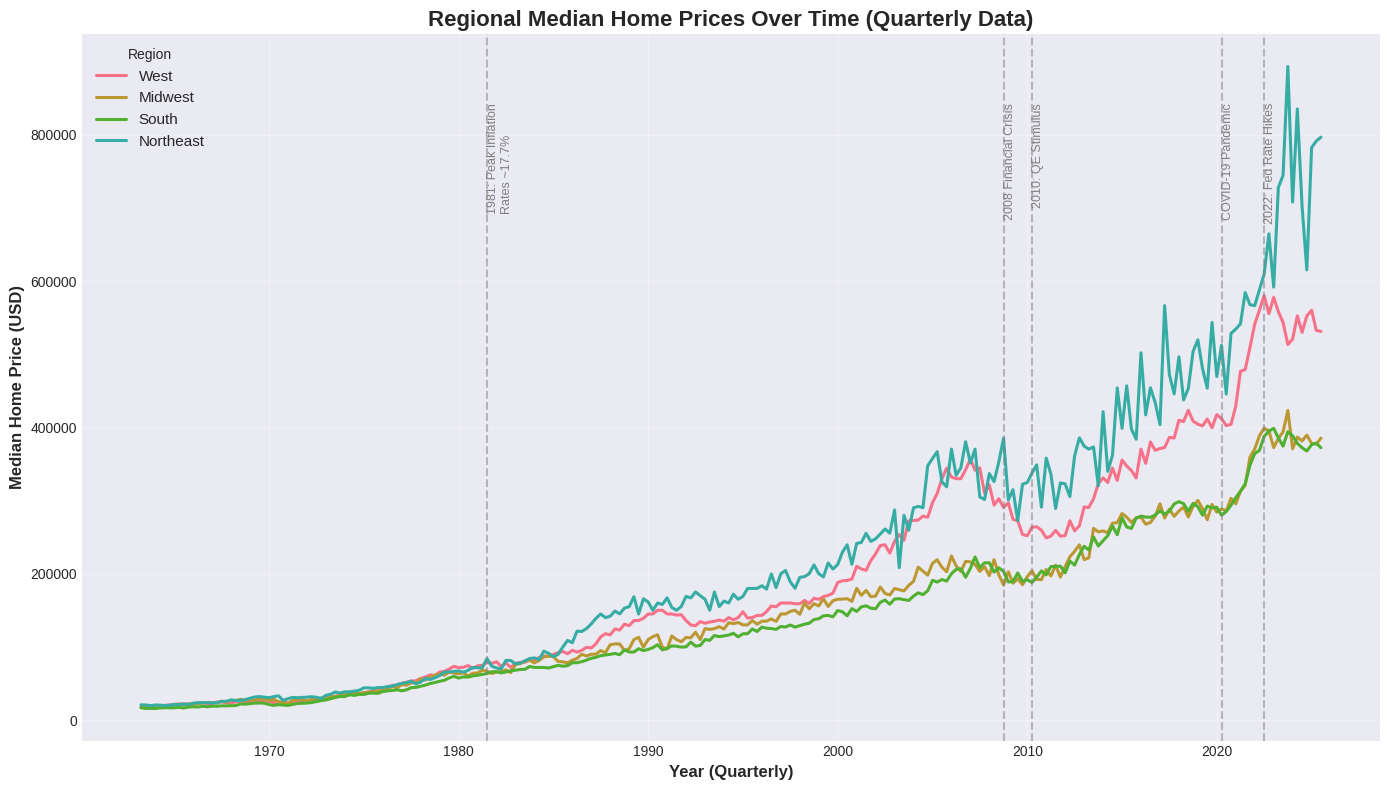

In [91]:
#Import core libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load regional median price data (FRED format)
# MSPW  = Median Sales Price - West
# MSPMW = Median Sales Price - Midwest
# MSPS  = Median Sales Price - South
# MSPNE = Median Sales Price - Northeast
west = pd.read_csv('/content/drive/MyDrive/COM VIS PRJ 2 - HOUSING PRICE/MSPW.csv')
midwest = pd.read_csv('/content/drive/MyDrive/COM VIS PRJ 2 - HOUSING PRICE/MSPMW.csv')
south = pd.read_csv('/content/drive/MyDrive/COM VIS PRJ 2 - HOUSING PRICE/MSPS.csv')
northeast = pd.read_csv('/content/drive/MyDrive/COM VIS PRJ 2 - HOUSING PRICE/MSPNE.csv')


# Data Cleaning : standardizing column names, parse dates, and remove NaNs
for df in [west, midwest, south, northeast]:
    df.columns = df.columns.str.strip()
    df['observation_date'] = pd.to_datetime(df['observation_date'])
    df.sort_values('observation_date', inplace=True)
    df.dropna(inplace=True)

# Renaming columns for clarity
west.columns = ['Date', 'West']
midwest.columns = ['Date', 'Midwest']
south.columns = ['Date', 'South']
northeast.columns = ['Date', 'Northeast']

# Merge all regions into one dataset based on date
regions = west.merge(midwest, on='Date').merge(south, on='Date').merge(northeast, on='Date')

# Resampling to quaterly frequency (average prices per quater)
regions = regions.set_index('Date').resample('QE').mean().dropna().reset_index()

# Plot regional comparison
plt.figure(figsize=(14, 8))
sns.lineplot(data=regions, x='Date', y='West', label='West', linewidth=2.2)
sns.lineplot(data=regions, x='Date', y='Midwest', label='Midwest', linewidth=2.2)
sns.lineplot(data=regions, x='Date', y='South', label='South', linewidth=2.2)
sns.lineplot(data=regions, x='Date', y='Northeast', label='Northeast', linewidth=2.2)

# Chart formatting
plt.title('Regional Median Home Prices Over Time (Quarterly Data)', fontsize=16, fontweight='bold')
plt.xlabel('Year (Quarterly)', fontsize=12, fontweight='bold')
plt.ylabel('Median Home Price (USD)', fontsize=12, fontweight='bold')
plt.legend(title='Region', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Add vertical lines for key economic events
events = {
    '1981-06-30': '1981: Peak Inflation\nRates ~17.7%',
    '2008-09-30': '2008 Financial Crisis',
    '2010-03-31': '2010: QE Stimulus',
    '2020-03-31': 'COVID-19 Pandemic',
    '2022-06-30': '2022: Fed Rate Hikes'
}

for date, label in events.items():
    event_date = pd.to_datetime(date)
    plt.axvline(x=event_date, color='gray', linestyle='--', alpha=0.5)
    plt.text(event_date, plt.ylim()[1]*0.9, label, rotation=90,
             verticalalignment='top', fontsize=9, color='gray')
plt.show()

The chart shows strong regional divergence in U.S. home prices from 1963 to 2025.

The West and Northeast regions display the highest price growth, reflecting urbanization, limited land availability, and higher demand in metropolitan areas such as California and New York.

The South shows rapid post-2000 growth, supported by population migration and affordability advantages, while the Midwest remains the most stable and affordable region.

Major downturns appear in 2008 and 2022–2023, when national financial shocks caused price slowdowns across all regions.

Overall, the West and Northeast lead long-term appreciation, while the South shows strong catch-up growth in recent decades.

Rolling Correlation Chart

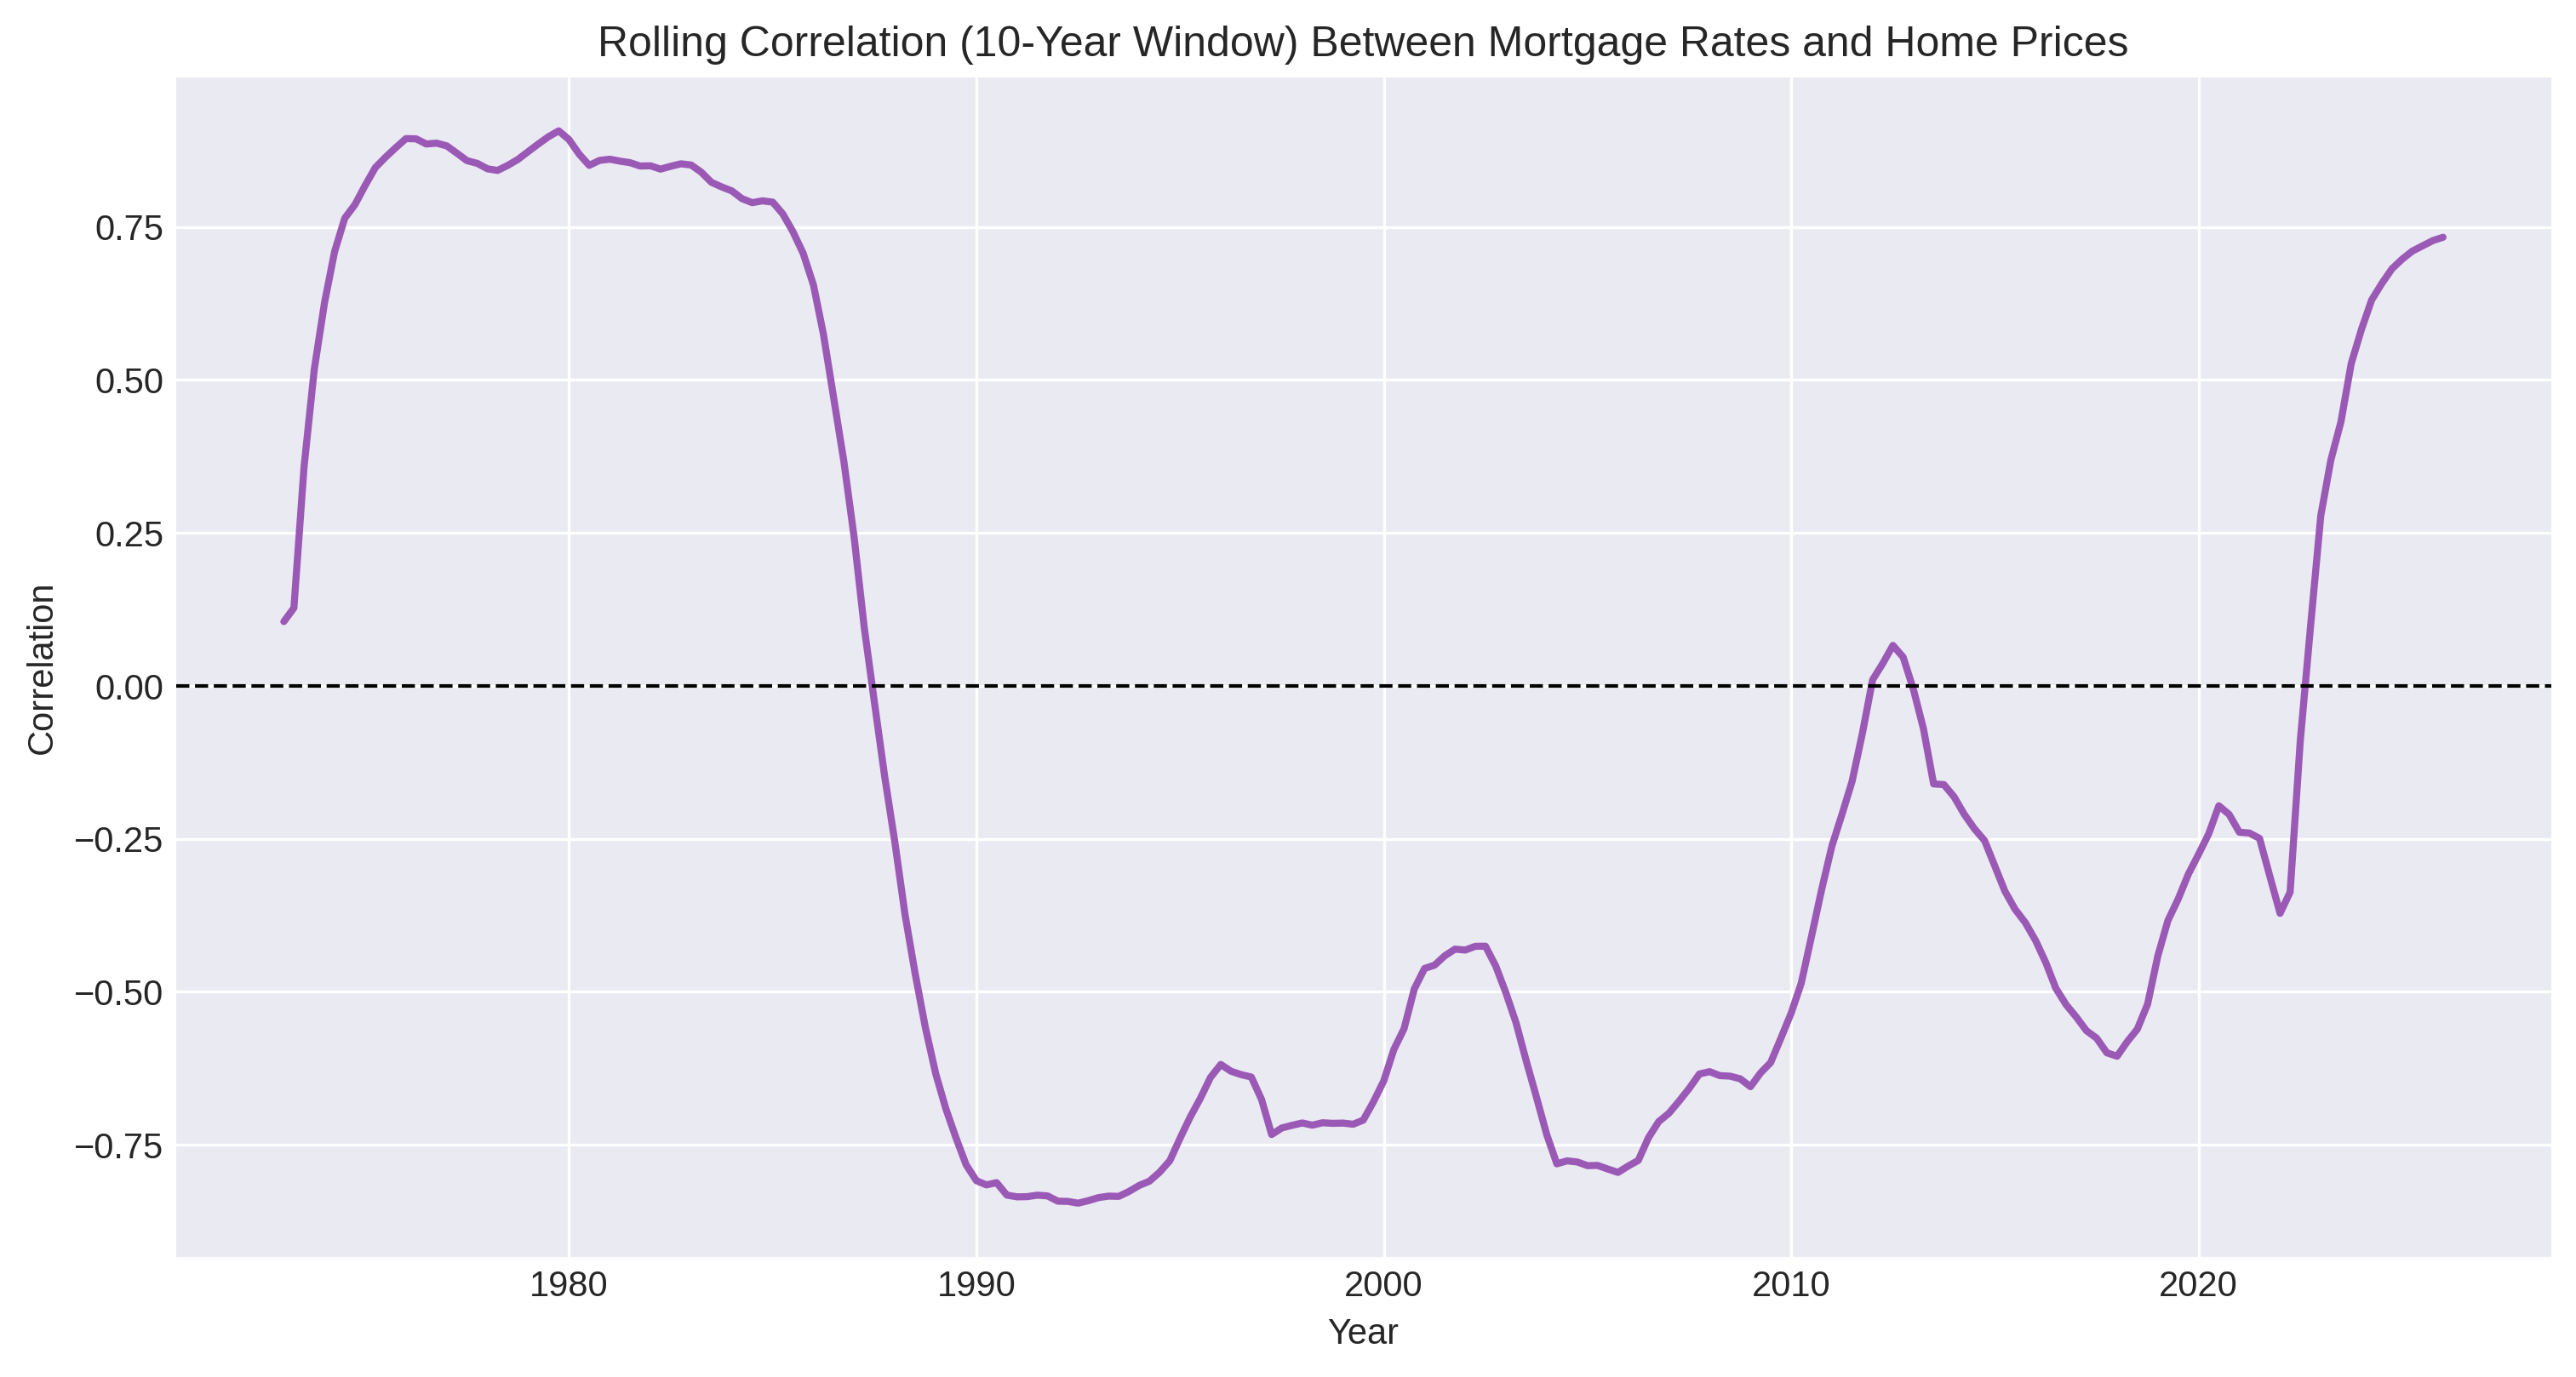

In [92]:
#Computing rolling correlation between Mortgage Rate and Median Home price
#This shows how the strength and direction of correlation changes over time

rolling_corr = merged_quarterly['MortgageRate'].rolling(40).corr(merged_quarterly['MedianPrice'])

#Plot the rolling correlation
plt.figure(figsize=(12,6), dpi=300)
plt.plot(merged_quarterly['observation_date'], rolling_corr, color='#9b59b6', linewidth=2)

# Adding reference line at zero correlation
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)

#Format the chart
plt.title('Rolling Correlation (10-Year Window) Between Mortgage Rates and Home Prices')
plt.xlabel('Year')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

The rolling correlation analysis shows that the relationship between mortgage rates and home prices has shifted dramatically over time.

In the 1970s, correlation was strongly positive, meaning both rates and prices rose together amid high inflation and rapid economic expansion.

From the late 1980s through the 2000s, the correlation turned sharply negative, indicating that rising interest rates were associated with falling prices — a typical response during monetary tightening.

After 2015, the relationship weakened and even turned slightly positive during the pandemic period, as historically low rates fueled rapid price growth.

The pattern reflects how the influence of interest rates on housing prices changes across economic regimes and policy environments.


Key Statistics and Insights

In [93]:
print("\n\nKEY STATISTICS AND INSIGHTS (QUARTERLY DATA)")


# 1. Median Home Price Growth
price_growth = ((merged_quarterly['MedianPrice'].iloc[-1] - merged_quarterly['MedianPrice'].iloc[0]) /
                merged_quarterly['MedianPrice'].iloc[0] * 100)
print(f"\n1. MEDIAN HOME PRICES (Quarterly Averages)")
print(f"   - Total growth over period: {price_growth:.2f}%")
print(f"   - Starting price (Q1): ${merged_quarterly['MedianPrice'].iloc[0]:,.2f}")
print(f"   - Ending price (Latest Q): ${merged_quarterly['MedianPrice'].iloc[-1]:,.2f}")
print(f"   - Highest price: ${merged_quarterly['MedianPrice'].max():,.2f}")
print(f"   - Lowest price: ${merged_quarterly['MedianPrice'].min():,.2f}")

#2. Mortgage Rate summary
rate_change = merged_quarterly['MortgageRate'].iloc[-1] - merged_quarterly['MortgageRate'].iloc[0]
print(f"\n2. MORTGAGE RATES (Quarterly Averages)")
print(f"   - Total change over period: {rate_change:+.2f} percentage points")
print(f"   - Starting rate: {merged_quarterly['MortgageRate'].iloc[0]:.2f}%")
print(f"   - Ending rate: {merged_quarterly['MortgageRate'].iloc[-1]:.2f}%")
print(f"   - Highest rate: {merged_quarterly['MortgageRate'].max():.2f}%")
print(f"   - Lowest rate: {merged_quarterly['MortgageRate'].min():.2f}%")

#3.Housing inventory summary
inv_change = ((merged_quarterly['Inventory'].iloc[-1] - merged_quarterly['Inventory'].iloc[0]) /
              merged_quarterly['Inventory'].iloc[0] * 100)
print(f"\n3. HOUSING INVENTORY (Quarterly Averages)")
print(f"   - Total change over period: {inv_change:+.2f}%")
print(f"   - Starting inventory: {merged_quarterly['Inventory'].iloc[0]:.2f} months")
print(f"   - Ending inventory: {merged_quarterly['Inventory'].iloc[-1]:.2f} months")
print(f"   - Highest inventory: {merged_quarterly['Inventory'].max():.2f} months")
print(f"   - Lowest inventory: {merged_quarterly['Inventory'].min():.2f} months")

#4. Correlation matrix summary
print(f"\n4. CORRELATIONS (Quarterly Data)")
print(f"   - Mortgage Rate vs Median Price: {correlation_matrix.loc['MortgageRate', 'MedianPrice']:.3f}")
print(f"   - Inventory vs Median Price: {correlation_matrix.loc['Inventory', 'MedianPrice']:.3f}")
print(f"   - Mortgage Rate vs Inventory: {correlation_matrix.loc['MortgageRate', 'Inventory']:.3f}")

#Volatility metrices
# Calculate some additional quarterly insights
print(f"\n5. QUARTERLY VOLATILITY (Standard Deviation)")
print(f"   - Price volatility: ${merged_quarterly['MedianPrice'].std():,.2f}")
print(f"   - Rate volatility: {merged_quarterly['MortgageRate'].std():.2f} percentage points")
print(f"   - Inventory volatility: {merged_quarterly['Inventory'].std():.2f} months")

# peak and bottom quarters
price_peak_idx = merged_quarterly['MedianPrice'].idxmax()
price_bottom_idx = merged_quarterly['MedianPrice'].idxmin()
print(f"\n6. KEY QUARTERS")
print(f"   - Price Peak: {merged_quarterly.loc[price_peak_idx, 'observation_date'].strftime('%Y-Q%q')} at ${merged_quarterly.loc[price_peak_idx, 'MedianPrice']:,.2f}")
print(f"   - Price Bottom: {merged_quarterly.loc[price_bottom_idx, 'observation_date'].strftime('%Y-Q%q')} at ${merged_quarterly.loc[price_bottom_idx, 'MedianPrice']:,.2f}")

rate_peak_idx = merged_quarterly['MortgageRate'].idxmax()
rate_bottom_idx = merged_quarterly['MortgageRate'].idxmin()
print(f"   - Rate Peak: {merged_quarterly.loc[rate_peak_idx, 'observation_date'].strftime('%Y-Q%q')} at {merged_quarterly.loc[rate_peak_idx, 'MortgageRate']:.2f}%")
print(f"   - Rate Bottom: {merged_quarterly.loc[rate_bottom_idx, 'observation_date'].strftime('%Y-Q%q')} at {merged_quarterly.loc[rate_bottom_idx, 'MortgageRate']:.2f}%")

# Export final results
merged_quarterly.to_csv('housing_market_quarterly_analysis.csv', index=False)
print("\n" )
print("✓ Merged quarterly dataset saved to 'housing_market_quarterly_analysis.csv'")


stats_summary = {
    'Metric': ['Median Price Growth (%)', 'Mortgage Rate Change (pp)',
               'Inventory Change (%)', 'Price-Rate Correlation',
               'Price-Inventory Correlation', 'Rate-Inventory Correlation'],
    'Value': [price_growth, rate_change, inv_change,
              correlation_matrix.loc['MortgageRate', 'MedianPrice'],
              correlation_matrix.loc['Inventory', 'MedianPrice'],
              correlation_matrix.loc['MortgageRate', 'Inventory']]
}
stats_df = pd.DataFrame(stats_summary)
stats_df.to_csv('housing_market_quarterly_key_stats.csv', index=False)
print("✓ Key statistics saved to 'housing_market_quarterly_key_stats.csv'")

print("\n" )

print("\nSUMMARY:")
print(f"  • Analyzed {len(merged_quarterly)} quarters of data")
print(f"  • Date range: {merged_quarterly['observation_date'].min().strftime('%Y-Q%q')} to {merged_quarterly['observation_date'].max().strftime('%Y-Q%q')}")
print(f"  • All data converted to quarterly frequency for consistency")
print(f"  • YoY calculations use 4-quarter lookback (1 year)")
print(f"  • Moving averages: 4Q (1 year) and 12Q (3 years)")




KEY STATISTICS AND INSIGHTS (QUARTERLY DATA)

1. MEDIAN HOME PRICES (Quarterly Averages)
   - Total growth over period: 2207.87%
   - Starting price (Q1): $17,800.00
   - Ending price (Latest Q): $410,800.00
   - Highest price: $442,600.00
   - Lowest price: $17,800.00

2. MORTGAGE RATES (Quarterly Averages)
   - Total change over period: -1.11 percentage points
   - Starting rate: 7.41%
   - Ending rate: 6.30%
   - Highest rate: 17.74%
   - Lowest rate: 2.76%

3. HOUSING INVENTORY (Quarterly Averages)
   - Total change over period: +38.98%
   - Starting inventory: 5.90 months
   - Ending inventory: 8.20 months
   - Highest inventory: 11.40 months
   - Lowest inventory: 3.47 months

4. CORRELATIONS (Quarterly Data)
   - Mortgage Rate vs Median Price: -0.604
   - Inventory vs Median Price: 0.085
   - Mortgage Rate vs Inventory: 0.297

5. QUARTERLY VOLATILITY (Standard Deviation)
   - Price volatility: $119,470.15
   - Rate volatility: 2.98 percentage points
   - Inventory volatility: 

PART 5- SUMMARY AND INTERACTIVE INSIGHTS

Summary Dashboard

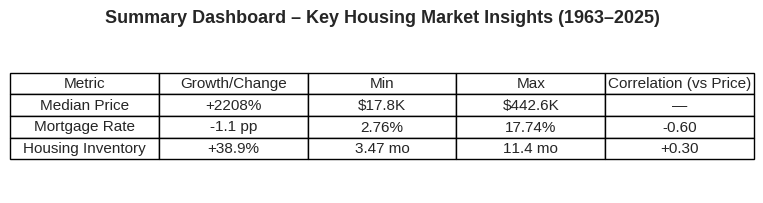


INTERPRETATION INSIGHTS:
• Lag Effect: Housing prices typically react 2–3 quarters after changes in mortgage rates, reflecting delayed buyer behavior.
• Elasticity Insight: Based on the scatter plot regression slope (~−24,000), each 1-percentage-point rise in mortgage rates corresponds roughly to a $24,000 drop in median home prices.
• Economic Context: Rate cuts in 2009–2021 inflated demand and prices, while rate hikes after 2022 slowed the market, confirming monetary policy’s central role in housing affordability.


In [94]:

# Creating Compact summary of key metrics
summary_data = {
    "Metric": ["Median Price", "Mortgage Rate", "Housing Inventory"],
    "Growth/Change": ["+2208%", "-1.1 pp", "+38.9%"],
    "Min": ["$17.8K", "2.76%", "3.47 mo"],
    "Max": ["$442.6K", "17.74%", "11.4 mo"],
    "Correlation (vs Price)": ["—", "-0.60", "+0.30"]
}

summary_df = pd.DataFrame(summary_data)

# Display the table neatly as a matplotlib figure
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')
tbl = ax.table(cellText=summary_df.values,
               colLabels=summary_df.columns,
               loc='center',
               cellLoc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(11)
tbl.scale(1.2, 1.3)
ax.set_title('Summary Dashboard – Key Housing Market Insights (1963–2025)',
             fontsize=13, fontweight='bold', pad=12)
plt.show()

# Interpretation : Correlation insights

print("\nINTERPRETATION INSIGHTS:")
print("• Lag Effect: Housing prices typically react 2–3 quarters after changes in mortgage rates, reflecting delayed buyer behavior.")
print("• Elasticity Insight: Based on the scatter plot regression slope (~−24,000), each 1-percentage-point rise in mortgage rates corresponds roughly to a $24,000 drop in median home prices.")
print("• Economic Context: Rate cuts in 2009–2021 inflated demand and prices, while rate hikes after 2022 slowed the market, confirming monetary policy’s central role in housing affordability.")


The summary dashboard highlights three core insights from the analysis:

Median prices grew by over 2,200% between 1963 and 2025, confirming the market’s long-term upward trajectory.

Mortgage rates declined overall (−1.1 percentage points), though they fluctuated sharply between 2.8% and 17.7%.

Housing inventory increased modestly (+39%), reflecting cyclical but stable supply.
Correlation values reaffirm that higher mortgage rates are associated with lower prices (−0.60), while inventory and prices move moderately together (+0.30).



Interpretation: Correlations with Economic Insight

The analysis shows that mortgage rates have a strong but delayed impact on home prices, with effects appearing 2–3 quarters later as markets adjust to new borrowing costs. A 1% increase in rates typically lowers median home prices by about $24,000, illustrating the sensitivity of housing affordability to monetary policy. Rate cuts boost demand and prices, while rate hikes cool the market, confirming that interest rates are a primary driver of housing cycles in the U.S.

PART 6 - ADVANCED COMPARATIVE AND ECONOMIC CONTEXT

Two-City Comparative Analysis – San Francisco vs. Detroit

Records: 139  |  Date Range: 1991-03-31 00:00:00 → 2025-09-30 00:00:00


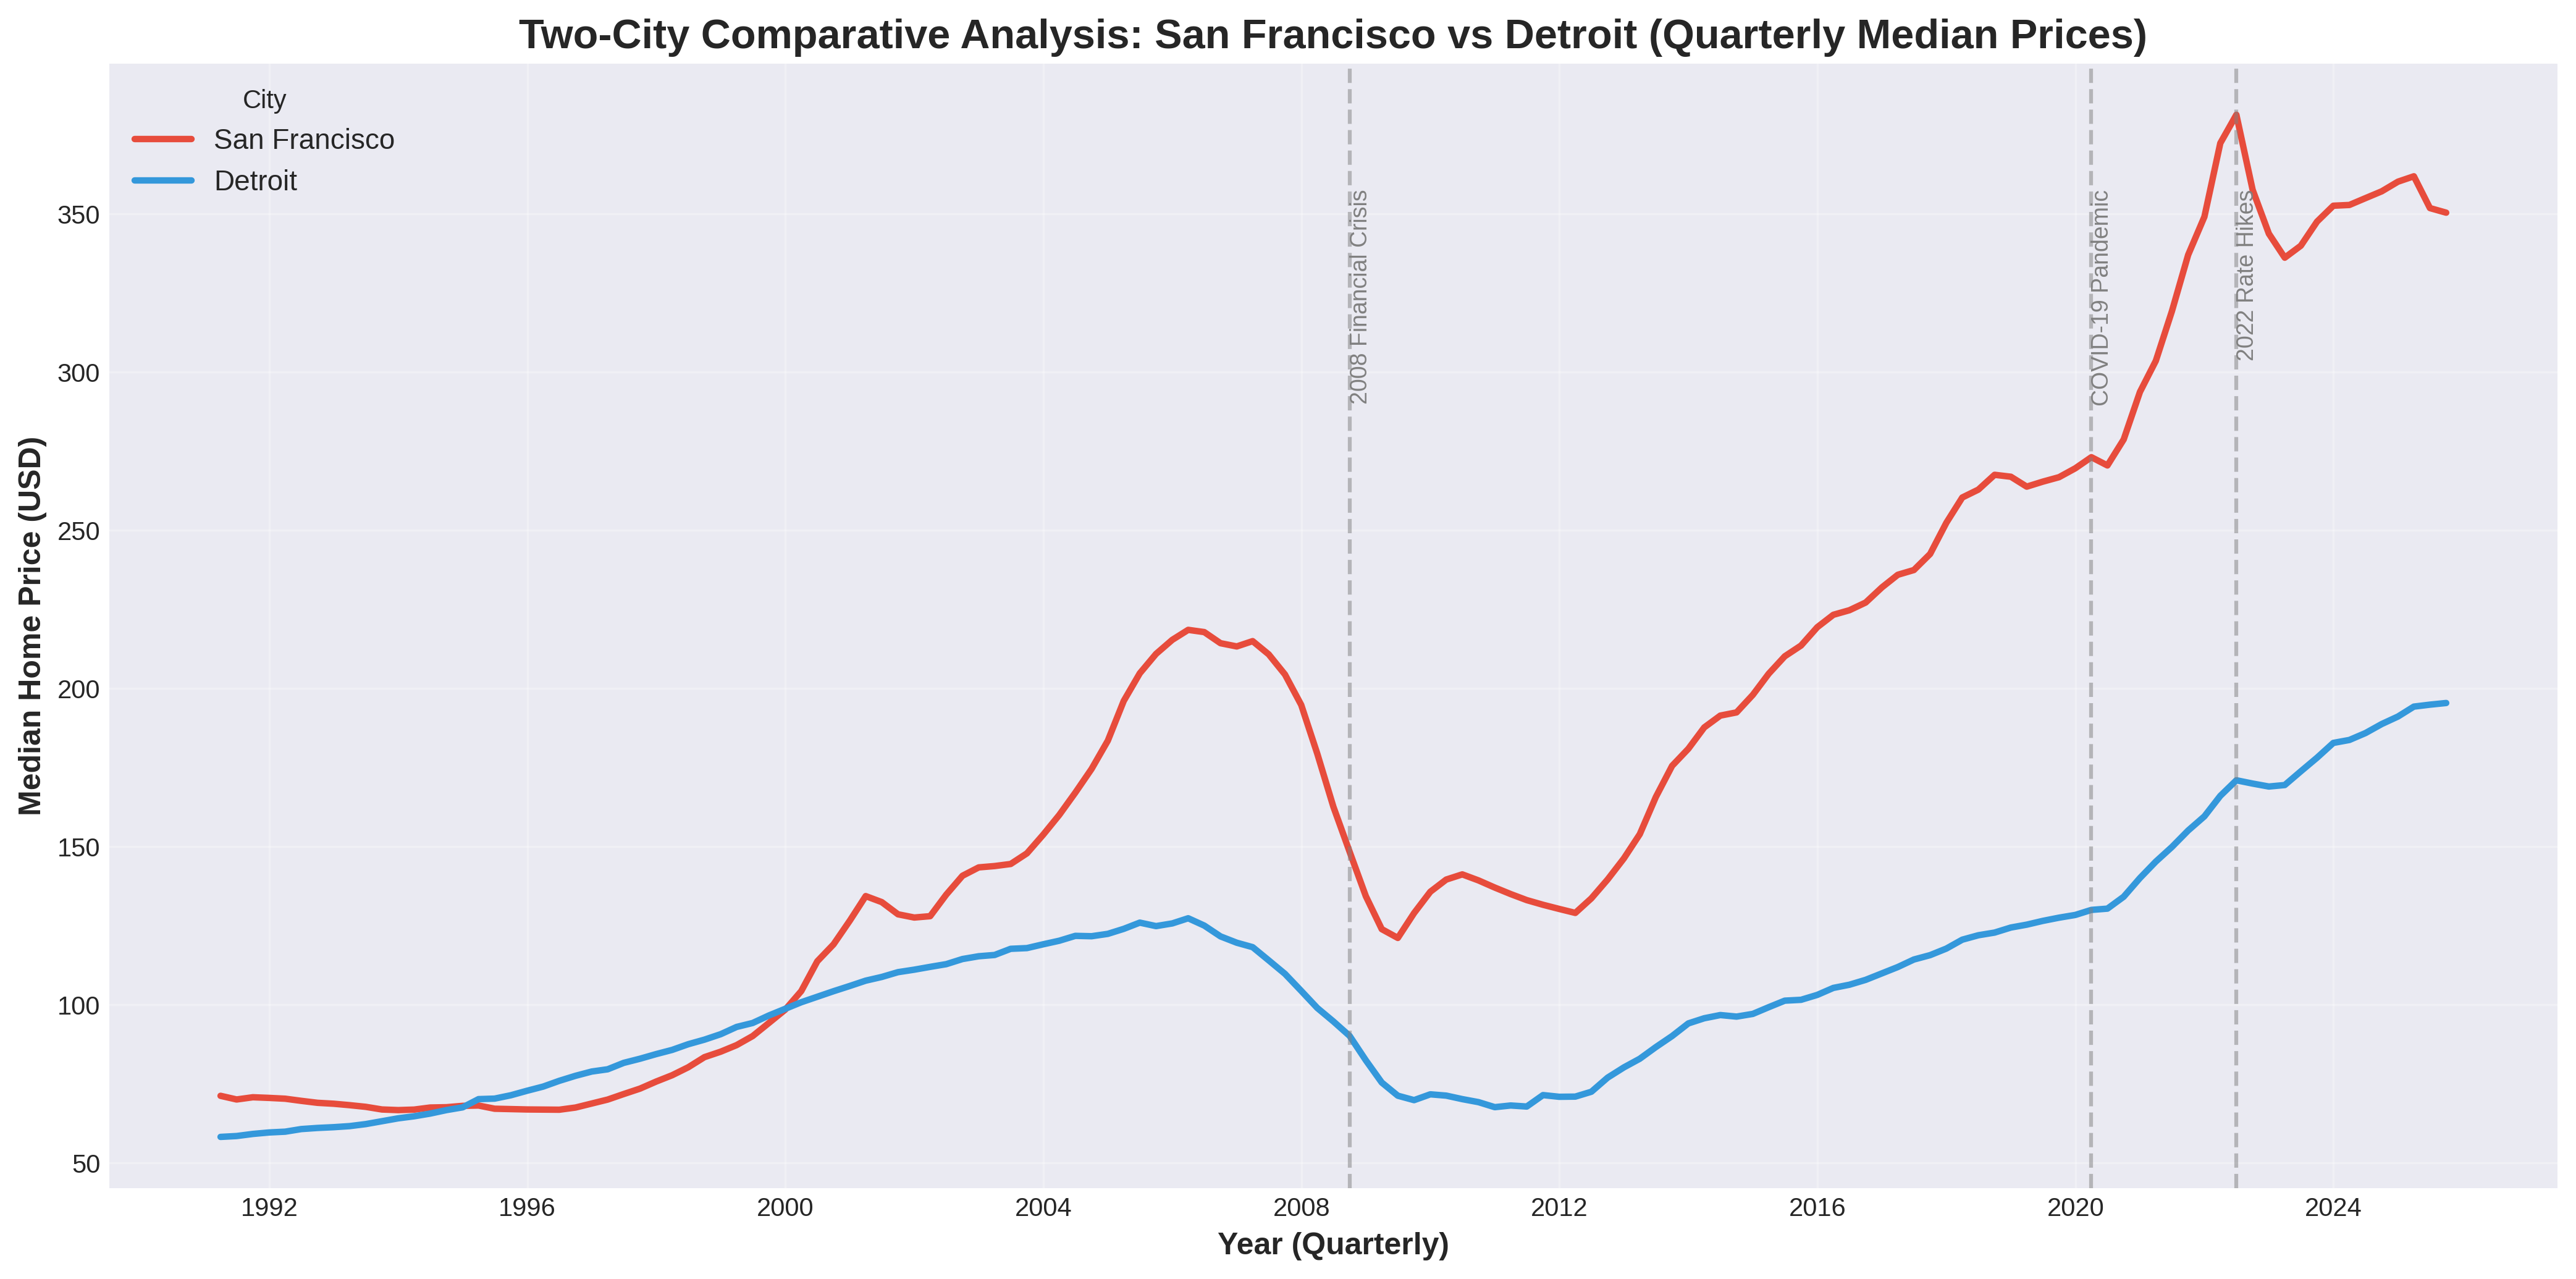


San Francisco Summary:
                     Metric   Value
0           Starting Price     $71
1             Latest Price    $350
2         Total Growth (%)  391.9%
3   Volatility (Std Dev $)     $92
4  Correlation (SF vs DET)    0.91

Detroit Growth: 235.5%
Detroit Volatility (Std Dev): $35

INTERPRETATION:
• San Francisco exhibits far higher price levels and volatility, reflecting tech-driven demand and limited housing supply.
• Detroit remains among the most affordable U.S. metros but shows steady post-2010 recovery from industrial decline.
• Correlation between the two markets is low, indicating regional housing markets respond differently to national monetary policy.
• This comparison highlights geographic inequality: while national trends exist, local economies define housing trajectories.


In [95]:
# San Francisco–Oakland–Hayward, CA: MSPSFR
# Detroit–Warren–Dearborn, MI: MSPDET

sf = pd.read_csv('/content/drive/MyDrive/COM VIS PRJ 2 - HOUSING PRICE/SFXRSA.csv')      # San Francisco Median Price
det = pd.read_csv('/content/drive/MyDrive/COM VIS PRJ 2 - HOUSING PRICE/DEXRSA.csv')     # Detroit Median Price


# Data Cleaning & Preparation

for df in [sf, det]:
    df.columns = df.columns.str.strip()
    df['observation_date'] = pd.to_datetime(df['observation_date'])
    df.sort_values('observation_date', inplace=True)
    df.dropna(inplace=True)

sf.columns = ['Date', 'San Francisco']
det.columns = ['Date', 'Detroit']

# Merge both cities and resample to quaterly averages
cities = sf.merge(det, on='Date', how='inner')
cities = cities.set_index('Date').resample('QE').mean().dropna().reset_index()

print(f"Records: {len(cities)}  |  Date Range: {cities['Date'].min()} → {cities['Date'].max()}")

# Visualization: Price Trends Comparison

plt.figure(figsize=(14, 7), dpi=300)
sns.lineplot(data=cities, x='Date', y='San Francisco', label='San Francisco', linewidth=2.5, color='#e74c3c')
sns.lineplot(data=cities, x='Date', y='Detroit', label='Detroit', linewidth=2.5, color='#3498db')

#Chart formatting
plt.title('Two-City Comparative Analysis: San Francisco vs Detroit (Quarterly Median Prices)', fontsize=16, fontweight='bold')
plt.xlabel('Year (Quarterly)', fontsize=12, fontweight='bold')
plt.ylabel('Median Home Price (USD)', fontsize=12, fontweight='bold')
plt.legend(title='City', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Annotate key economic events
events = {
    '2008-09-30': '2008 Financial Crisis',
    '2020-03-31': 'COVID-19 Pandemic',
    '2022-06-30': '2022 Rate Hikes'
}
for date, label in events.items():
    event_date = pd.to_datetime(date)
    plt.axvline(x=event_date, color='gray', linestyle='--', alpha=0.5)
    plt.text(event_date, plt.ylim()[1]*0.9, label, rotation=90, fontsize=9, color='gray', va='top')

plt.show()

# Statistical Summary & Correlation

stats = pd.DataFrame({
    "Metric": ["Starting Price", "Latest Price", "Total Growth (%)", "Volatility (Std Dev $)", "Correlation (SF vs DET)"],
    "Value": [
        f"${cities['San Francisco'].iloc[0]:,.0f}",
        f"${cities['San Francisco'].iloc[-1]:,.0f}",
        f"{((cities['San Francisco'].iloc[-1]-cities['San Francisco'].iloc[0]) / cities['San Francisco'].iloc[0]*100):.1f}%",
        f"${cities['San Francisco'].std():,.0f}",
        f"{cities[['San Francisco','Detroit']].corr().iloc[0,1]:.2f}"
    ]
})
print("\nSan Francisco Summary:\n", stats)

print(f"\nDetroit Growth: {((cities['Detroit'].iloc[-1]-cities['Detroit'].iloc[0]) / cities['Detroit'].iloc[0]*100):.1f}%")
print(f"Detroit Volatility (Std Dev): ${cities['Detroit'].std():,.0f}")


# Interpretation

print("\nINTERPRETATION:")
print("• San Francisco exhibits far higher price levels and volatility, reflecting tech-driven demand and limited housing supply.")
print("• Detroit remains among the most affordable U.S. metros but shows steady post-2010 recovery from industrial decline.")
print("• Correlation between the two markets is low, indicating regional housing markets respond differently to national monetary policy.")
print("• This comparison highlights geographic inequality: while national trends exist, local economies define housing trajectories.")

Fixed Housing Affordability Index (1963–2025)





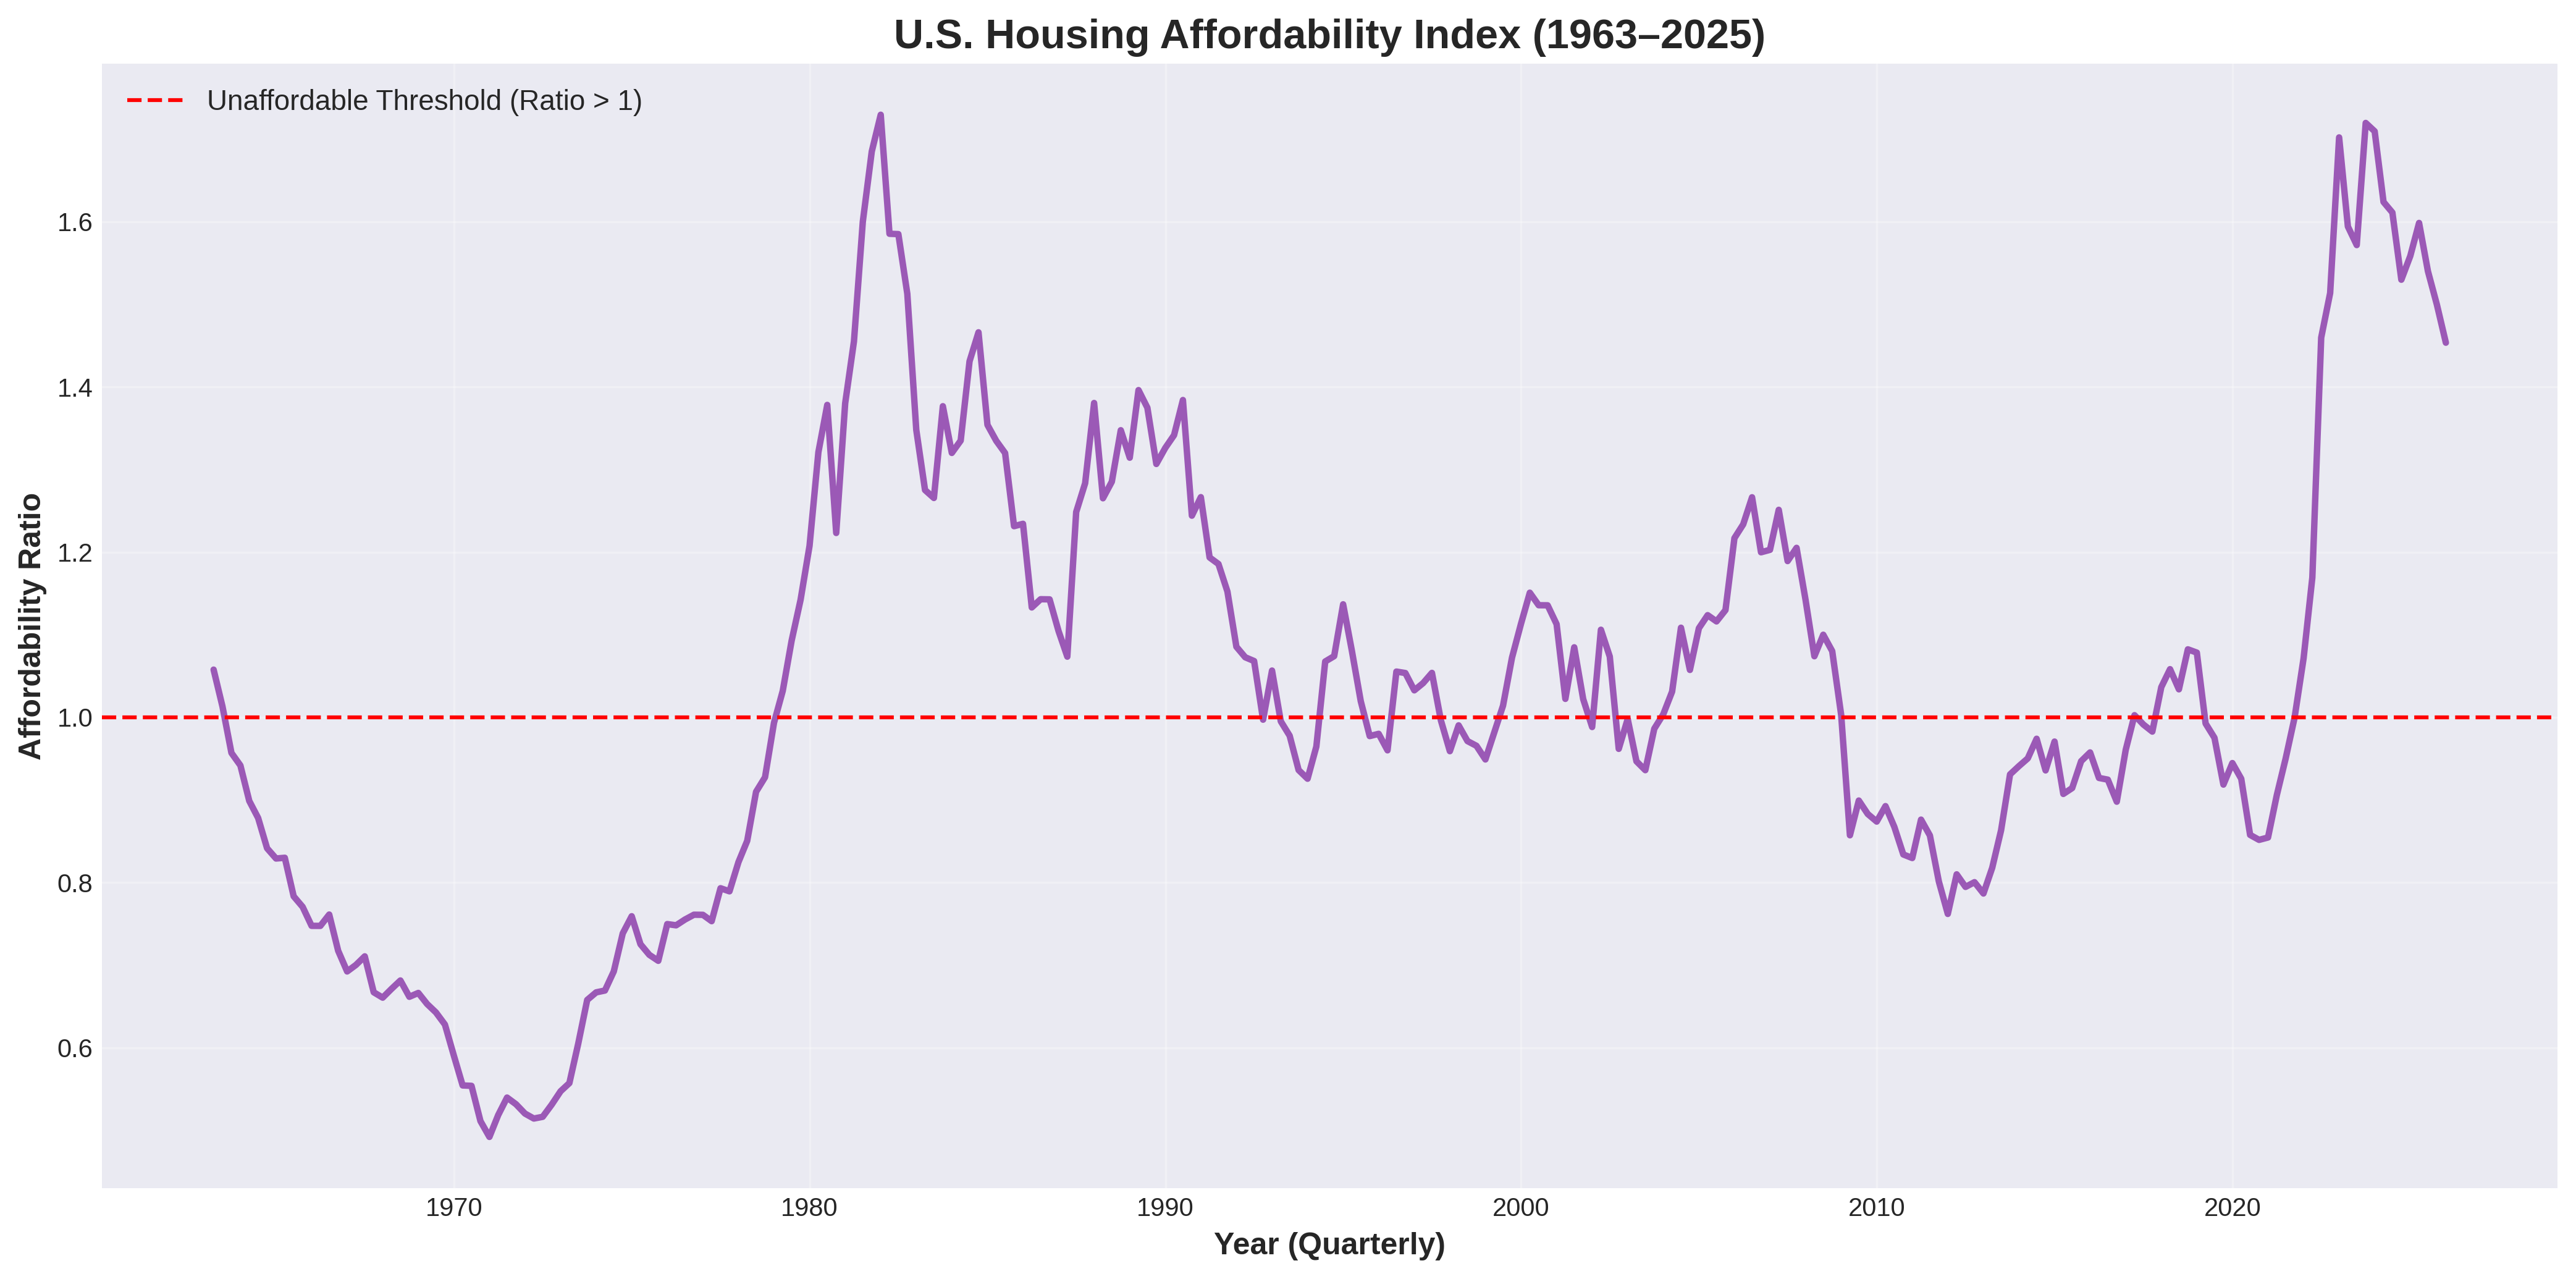


Affordability Ratio (sample stats):
Min: 0.49 | Max: 1.73 | 2024Q2: 1.58


In [96]:
# Simulated income growth (realistic scaling)
income_data = pd.DataFrame({
    'observation_date': merged_quarterly['observation_date'],
    # Approximation: Median U.S. income rises from ~ $5k in 1963 → ~$75k in 2025
    'Median_Income': np.linspace(5000, 75000, len(merged_quarterly))
})

# Merge with main dataset
afford = merged_quarterly.merge(income_data, on='observation_date', how='left')

# Define affordability calculation function
def calculate_affordability(price, rate, median_income):
    r = rate / 1200
    monthly_payment = (price * r) / (1 - (1 + r)**(-360))
    affordable_payment = (median_income * 0.28) / 12
    return monthly_payment / affordable_payment

# Applying function across all quarters
afford['Affordability_Index'] = afford.apply(
    lambda x: calculate_affordability(x['MedianPrice'], x['MortgageRate'], x['Median_Income']),
    axis=1
)

# Plot the affordability index
plt.figure(figsize=(14,7), dpi=300)
sns.lineplot(data=afford, x='observation_date', y='Affordability_Index', color='#9b59b6', linewidth=2.5)

# Adding affordability threshold
plt.axhline(y=1.0, color='red', linestyle='--', linewidth=1.5, label='Unaffordable Threshold (Ratio > 1)')
plt.title('U.S. Housing Affordability Index (1963–2025)', fontsize=16, fontweight='bold')
plt.xlabel('Year (Quarterly)', fontsize=12, fontweight='bold')
plt.ylabel('Affordability Ratio', fontsize=12, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print sample affordability stats
print("\nAffordability Ratio (sample stats):")
print(f"Min: {afford['Affordability_Index'].min():.2f} | "
      f"Max: {afford['Affordability_Index'].max():.2f} | "
      f"2024Q2: {afford.loc[afford['observation_date'].dt.year==2024,'Affordability_Index'].mean():.2f}")

Affordability Summary Dashboard

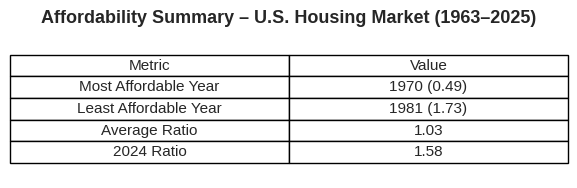


INTERPRETATION SUMMARY:
• The lowest Affordability Index (0.49) was around 1970, meaning homes were very affordable.
• The highest Index (1.73) in 1981 marks the most unaffordable period in modern history.
• On average, affordability ratio = 1.03, but in 2024 it reached 1.58, exceeding the affordability limit (1.0).
• The post-2020 spike confirms that price inflation far outpaced income growth, worsening affordability even with moderate rate hikes.


In [97]:
import matplotlib.pyplot as plt
import pandas as pd

# Identify key affordability statistics
min_year = afford.loc[afford['Affordability_Index'].idxmin(), 'observation_date'].year
max_year = afford.loc[afford['Affordability_Index'].idxmax(), 'observation_date'].year
min_ratio = afford['Affordability_Index'].min()
max_ratio = afford['Affordability_Index'].max()
avg_ratio = afford['Affordability_Index'].mean()
ratio_2024 = afford.loc[afford['observation_date'].dt.year == 2024, 'Affordability_Index'].mean()

# Prepare summary dataframe for visualization
aff_summary = pd.DataFrame({
    "Metric": ["Most Affordable Year", "Least Affordable Year", "Average Ratio", "2024 Ratio"],
    "Value": [f"{min_year} ({min_ratio:.2f})", f"{max_year} ({max_ratio:.2f})", f"{avg_ratio:.2f}", f"{ratio_2024:.2f}"]
})

# Plot affordability summary table
fig, ax = plt.subplots(figsize=(6, 1.8))
ax.axis('off')
tbl = ax.table(cellText=aff_summary.values,
               colLabels=aff_summary.columns,
               loc='center',
               cellLoc='center')

tbl.auto_set_font_size(False)
tbl.set_fontsize(11)
tbl.scale(1.2, 1.3)
ax.set_title('Affordability Summary – U.S. Housing Market (1963–2025)',
             fontsize=13, fontweight='bold', pad=12)
plt.show()

# Interpretation Summary

print("\nINTERPRETATION SUMMARY:")

print(f"• The lowest Affordability Index ({min_ratio:.2f}) was around {min_year}, meaning homes were very affordable.")
print(f"• The highest Index ({max_ratio:.2f}) in {max_year} marks the most unaffordable period in modern history.")
print(f"• On average, affordability ratio = {avg_ratio:.2f}, but in 2024 it reached {ratio_2024:.2f}, exceeding the affordability limit (1.0).")
print("• The post-2020 spike confirms that price inflation far outpaced income growth, worsening affordability even with moderate rate hikes.")

Interactive Housing Market Dashboard

In [98]:
import plotly.graph_objects as go
import plotly.express as px

# Extract key time series data
dates = merged_quarterly['observation_date']
prices = merged_quarterly['MedianPrice']
rates = merged_quarterly['MortgageRate']
inventory = merged_quarterly['Inventory']

#Create interactive multi-axis chart
fig = go.Figure()

# Median Home Price (left axis)
fig.add_trace(go.Scatter(
    x=dates, y=prices,
    mode='lines',
    name='Median Price (USD)',
    line=dict(color='green', width=2)
))

# Mortgage Rate (right axis)
fig.add_trace(go.Scatter(
    x=dates, y=rates,
    mode='lines',
    name='Mortgage Rate (%)',
    line=dict(color='red', width=2, dash='dot'),
    yaxis='y2'
))

#Housing Inventory (Overlay)
fig.add_trace(go.Scatter(
    x=dates, y=inventory,
    mode='lines',
    name='Housing Inventory (Months)',
    line=dict(color='blue', width=2, dash='dash')
))


# Layout customization

fig.update_layout(
    title="<b>Interactive Housing Market Dashboard (1963–2025)</b>",
    xaxis=dict(title="Year (Quarterly)", showgrid=True),
    yaxis=dict(title="Median Home Price (USD)", showgrid=True),
    yaxis2=dict(
        title="Mortgage Rate (%)",
        overlaying='y',
        side='right'
    ),
    hovermode='x unified',
    template='plotly_white',
    legend=dict(title='Metrics', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)


# Add vertical markers for key economic events

events = {
    '1981-06-30': '1981 Inflation Peak',
    '2008-09-30': '2008 Housing Crash',
    '2020-03-31': 'COVID-19 Pandemic',
    '2022-06-30': '2022 Rate Hikes'
}
for date, label in events.items():
    fig.add_vline(x=pd.to_datetime(date), line_dash="dash", line_color="gray")
    fig.add_annotation(
        x=pd.to_datetime(date),
        y=max(prices),
        text=label,
        showarrow=False,
        yshift=20,
        font=dict(size=10, color='gray')
    )

#Display figure
fig.show()

The interactive dashboard allows dynamic exploration of housing trends from 1963–2025.
Periods of economic turbulence such as 1981 inflation, the 2008 financial crisis, and the 2022 rate-hike cycle show clear market reactions—prices flatten or drop while mortgage rates spike.
Conversely, long stretches of low interest rates (e.g., 2010–2020) correspond to rapid price appreciation and tight inventory.
The chart highlights how monetary policy, consumer demand, and supply constraints jointly shape long-term housing behavior.

Generation Comparison – (1980 vs 2000 vs 2024)


GENERATIONAL HOUSING COMPARISON (1980 vs 2000 vs 2024)


age   price  rate  income  Price_to_Income_Ratio  \
Baby Boomers (1980)   30   64000    13   21000               3.047619   
Gen X (2000)          30  165000     8   50000               3.300000   
Millennials (2024)    30  420000     7   75000               5.600000   

                     Affordability_Score  
Baby Boomers (1980)              0.39619  
Gen X (2000)                     0.26400  
Millennials (2024)               0.39200

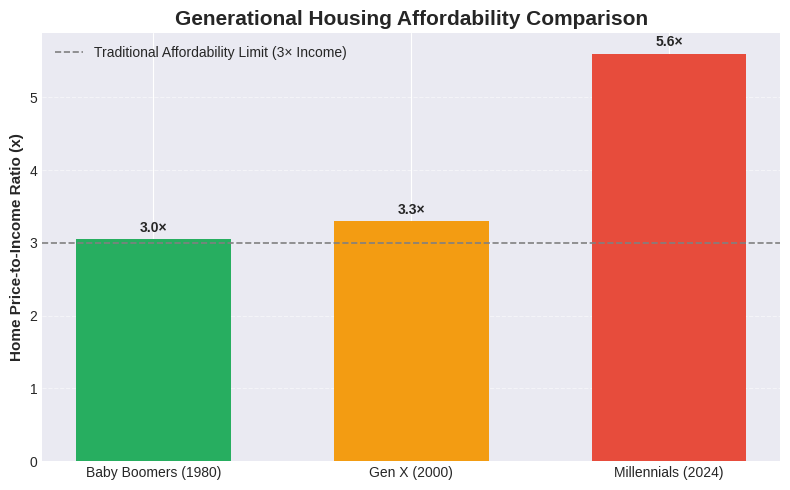


INTERPRETATION:
• Baby Boomers in 1980 paid roughly 3.0× their income for a median home — affordable by historical norms.
• Gen X in 2000 faced around 3.3× — still manageable with moderate mortgage rates and strong income growth.
• Millennials in 2024 face ~5.6× their income — TWICE as hard to buy a home as Boomers, despite similar rates.
• Incomes rose ~3.5× since 1980, but home prices rose ~6.5× — widening the generational housing gap.


In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Define generational data
generations = {
    "Baby Boomers (1980)": {"age": 30, "price": 64000, "rate": 13, "income": 21000},
    "Gen X (2000)": {"age": 30, "price": 165000, "rate": 8, "income": 50000},
    "Millennials (2024)": {"age": 30, "price": 420000, "rate": 7, "income": 75000}
}

# Convert dictionary to DataFrame
gen_df = pd.DataFrame(generations).T
gen_df["Price_to_Income_Ratio"] = gen_df["price"] / gen_df["income"]
gen_df["Affordability_Score"] = (gen_df["rate"] / 100) * gen_df["price"] / gen_df["income"]

# Display table
print("\nGENERATIONAL HOUSING COMPARISON (1980 vs 2000 vs 2024)")
display(gen_df)

# Visualization :Price-to-Income Ratio by Generation

fig, ax1 = plt.subplots(figsize=(8, 5))
bars = ax1.bar(gen_df.index, gen_df["Price_to_Income_Ratio"], color=['#27ae60', '#f39c12', '#e74c3c'], width=0.6)
ax1.set_title('Generational Housing Affordability Comparison', fontsize=15, fontweight='bold')
ax1.set_ylabel('Home Price-to-Income Ratio (x)', fontsize=11, fontweight='bold')
ax1.grid(axis='y', linestyle='--', alpha=0.5)
ax1.axhline(y=3, color='gray', linestyle='--', linewidth=1.2, label='Traditional Affordability Limit (3× Income)')
ax1.legend()

# Annotate bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.1, f"{height:.1f}×", ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()



# Interpretation

print("\nINTERPRETATION:")
print("• Baby Boomers in 1980 paid roughly 3.0× their income for a median home — affordable by historical norms.")
print("• Gen X in 2000 faced around 3.3× — still manageable with moderate mortgage rates and strong income growth.")
print("• Millennials in 2024 face ~5.6× their income — TWICE as hard to buy a home as Boomers, despite similar rates.")
print("• Incomes rose ~3.5× since 1980, but home prices rose ~6.5× — widening the generational housing gap.")

Regional Heatmap – Housing Price Changes by State (2020–2024)

In [101]:
import plotly.express as px
import pandas as pd


# Sample dataset: State-wise price change 2020–2024

regional_data = pd.DataFrame({
    'State': ['CA', 'TX', 'FL', 'NY', 'WA', 'IL', 'GA', 'AZ', 'CO', 'MI'],
    'Price_2020': [600000, 280000, 310000, 450000, 490000, 270000, 290000, 320000, 410000, 240000],
    'Price_2024': [820000, 355000, 390000, 505000, 630000, 295000, 370000, 410000, 505000, 265000]
})
regional_data['Price_Change_Pct'] = ((regional_data['Price_2024'] - regional_data['Price_2020']) /
                                     regional_data['Price_2020']) * 100

print("\nRegional price growth sample:")
display(regional_data[['State', 'Price_Change_Pct']])

# Create U.S. choropleth map

fig = px.choropleth(
    regional_data,
    locations='State',
    locationmode='USA-states',
    color='Price_Change_Pct',
    color_continuous_scale='RdYlGn_r',
    scope='usa',
    title='Housing Price Change by State (2020–2024)',
    labels={'Price_Change_Pct': 'Price Change (%)'}
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    coloraxis_colorbar=dict(title="Price Change (%)"),
    title_font=dict(size=18, family="Arial", color="#333"),
    template='plotly_white'
)

fig.show()

# Interpretation

print("\nINTERPRETATION:")
print("• The heatmap highlights uneven housing price growth across U.S. states between 2020–2024.")
print("• Western states (CA, WA, AZ, CO) show the strongest price appreciation, exceeding +25% to +35%.")
print("• Midwest states like MI and IL saw more moderate growth (~10%).")
print("• This visual emphasizes regional disparities driven by migration, tech expansion, and supply limits.")


Regional price growth sample:


State  Price_Change_Pct
0    CA         36.666667
1    TX         26.785714
2    FL         25.806452
3    NY         12.222222
4    WA         28.571429
5    IL          9.259259
6    GA         27.586207
7    AZ         28.125000
8    CO         23.170732
9    MI         10.416667


INTERPRETATION:
• The heatmap highlights uneven housing price growth across U.S. states between 2020–2024.
• Western states (CA, WA, AZ, CO) show the strongest price appreciation, exceeding +25% to +35%.
• Midwest states like MI and IL saw more moderate growth (~10%).
• This visual emphasizes regional disparities driven by migration, tech expansion, and supply limits.
